In [ ]:
!pip3 install basemap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger229032 - Copy.csv")

In [ ]:
data.head()
print(data.columns)

Index(['ID', 'individual-local-identifier', 'location-lat', 'location-long',
       'DEM', 'slope', 'temperature', 'Time_UTC', 'study-local-timestamp',
       'stepLength', 'duration', 'speed', 'year', 'month', 'day', 'hour',
       'daynight', 'drywet', 'LABEL'],
      dtype='object')


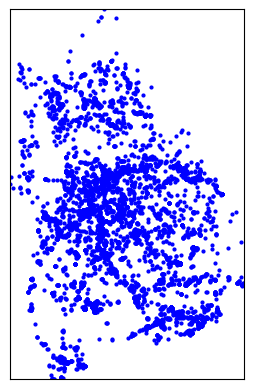

In [ ]:
m = Basemap(projection='mill', llcrnrlat=data['location-lat'].min(), urcrnrlat=data['location-lat'].max(),
            llcrnrlon=data['location-long'].min(), urcrnrlon=data['location-long'].max(), resolution='c')

# Plot your data points
x, y = m(data['location-long'].tolist(), data['location-lat'].tolist())
m.plot(x, y, 'bo', markersize=2)

# Show the plot
plt.show()

In [ ]:
 print(data.keys())

Index(['ID', 'individual-local-identifier', 'location-lat', 'location-long',
       'DEM', 'slope', 'temperature', 'Time_UTC', 'study-local-timestamp',
       'stepLength', 'duration', 'speed', 'year', 'month', 'day', 'hour',
       'daynight', 'drywet', 'LABEL'],
      dtype='object')


In [ ]:
data.shape

(7405, 19)

In [ ]:
from datetime import datetime
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from scipy.stats import gaussian_kde

# convert local timestamp to datetime type
data['Time_LMT'] = pd.to_datetime(data['study-local-timestamp'])

# Number of points and tiger
print(f"Total number of gps points: {data.shape[0]}")
print(f"Unique tiger id: {data['ID'].unique()}")

data.head()

Total number of gps points: 7405
Unique tiger id: [239849 239850 239851 ... 248470 248471 248472]


ID  individual-local-identifier  location-lat  location-long  \
0  239849                       229032     15.561250      99.362452   
1  239850                       229032     15.561212      99.362477   
2  239851                       229032     15.561350      99.362452   
3  239852                       229032     15.561242      99.362458   
4  239853                       229032     15.561545      99.362636   

          DEM     slope  temperature         Time_UTC study-local-timestamp  \
0  241.329040  2.259029           28  9/12/2019 16:00       9/12/2019 23:00   
1  241.555038  2.151275           28  9/12/2019 17:00        9/13/2019 0:00   
2  240.964172  2.496278           28  9/12/2019 18:00        9/13/2019 1:00   
3  241.379105  2.236959           29  9/12/2019 19:00        9/13/2019 2:00   
4  240.582275  2.669227           29  9/12/2019 20:00        9/13/2019 3:00   

   stepLength  duration     speed  year  month  day  hour daynight drywet  \
0    0.004533       1.0  0.004533  2019      9   12    23    night    wet   
1    0.005000       1.0  0.005000  2019      9   13     0    night    wet   
2    0.015671       1.0  0.015671  2019      9   13     1    night    wet   
3    0.012083       1.0  0.012083  2019      9   13     2    night    wet   
4    0.038666       1.0  0.038666  2019      9   13     3    night    wet   

  LABEL            Time_LMT  
0     R 2019-09-12 23:00:00  
1     R 2019-09-13 00:00:00  
2     R 2019-09-13 01:00:00  
3     R 2019-09-13 02:00:00  
4     E 2019-09-13 03:00:00

In [ ]:
# Extract latitude and longitude from your DataFrame
latitude = data['location-lat'].tolist()
longitude = data['location-long'].tolist()

# Create a list of Shapely Point objects from the latitude and longitude
points = [Point(lon, lat) for lat, lon in
          zip(latitude, longitude)]

# Select the tracking points to plot as a trajectory line
a = 0 # order of start xpoint
b = 7405 # Order of end point
x_points = [p.x for p in points[a:b]]
y_points = [p.y for p in points[a:b]]

In [ ]:
# Calculate the Minimum Convex Polygon (MCP) boundary using a density-based approach
from scipy.spatial import ConvexHull

# Calculate the number of points that should be included in the MCP (95% of total points)
num_points_to_include = int(len(points) * 0.10)

# Find the indices of the points to be included in the MCP
hull = ConvexHull([(p.x, p.y) for p in points[a:b]]) # I set the home range change with selected points, feel free to revise
indices_to_include = hull.vertices[:num_points_to_include]

# Create the 95% MCP home range boundary using the selected points
mcp_95_boundary = Polygon([(points[i].x, points[i].y) for i in indices_to_include])

In [ ]:
# Create a list of Shapely Point objects from the latitude and longitude
points = [Point(lon, lat) for lat, lon in zip(latitude, longitude)]

# Select the tracking points to plot as a trajectory line
ae = 0 # order of start point
be = 7405 # Order of end point
x_pointss = [p.x for p in points[ae:be]]
y_pointss = [p.y for p in points[ae:be]]


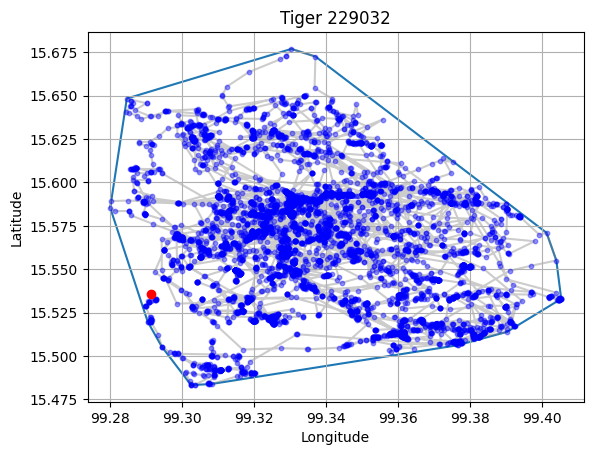

In [ ]:
# Plot the MCP boundary
x, y = mcp_95_boundary.exterior.xy
plt.plot(x, y, label="95% MCP Home Range Boundary", zorder=0)

# Plot the trajectory line, at the bottom layer
plt.plot(x_pointss, y_pointss, c='grey', alpha = 0.4, label="Trajectory", zorder = 1)

# Plot all tracking points as individual points, at the second layer
plt.scatter(x_pointss, y_pointss, c='blue', alpha =0.4,s=10,label="Tracking Points", zorder = 2)

# Plot the last tracking point, at the top layer
plt.scatter(x_pointss[-1], y_pointss[-1], c='red', label="Last Tracking Point" ,zorder = 3)

# Add labels, legend, and show the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#plt.legend()
plt.title("Tiger 229032")
plt.savefig("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/Tiger229032.png")
plt.grid()
plt.show()


# Exploratory Part and Data Filtering

In [ ]:
label_map = {'E': 'Exploring', 'R': 'Resting', 'H': 'Hunting'}
data['labels_full'] = data['LABEL'].map(label_map)

In [ ]:
data['day'].max()

31

In [ ]:
data.head()

ID  individual-local-identifier  location-lat  location-long  \
0  239849                       229032     15.561250      99.362452   
1  239850                       229032     15.561212      99.362477   
2  239851                       229032     15.561350      99.362452   
3  239852                       229032     15.561242      99.362458   
4  239853                       229032     15.561545      99.362636   

          DEM     slope  temperature         Time_UTC study-local-timestamp  \
0  241.329040  2.259029           28  9/12/2019 16:00       9/12/2019 23:00   
1  241.555038  2.151275           28  9/12/2019 17:00        9/13/2019 0:00   
2  240.964172  2.496278           28  9/12/2019 18:00        9/13/2019 1:00   
3  241.379105  2.236959           29  9/12/2019 19:00        9/13/2019 2:00   
4  240.582275  2.669227           29  9/12/2019 20:00        9/13/2019 3:00   

   stepLength  ...     speed  year  month  day  hour  daynight drywet LABEL  \
0    0.004533  ...  0.004533  2019      9   12    23     night    wet     R   
1    0.005000  ...  0.005000  2019      9   13     0     night    wet     R   
2    0.015671  ...  0.015671  2019      9   13     1     night    wet     R   
3    0.012083  ...  0.012083  2019      9   13     2     night    wet     R   
4    0.038666  ...  0.038666  2019      9   13     3     night    wet     E   

             Time_LMT labels_full  
0 2019-09-12 23:00:00     Resting  
1 2019-09-13 00:00:00     Resting  
2 2019-09-13 01:00:00     Resting  
3 2019-09-13 02:00:00     Resting  
4 2019-09-13 03:00:00   Exploring  

[5 rows x 21 columns]

In [ ]:

data['study-local-timestamp'] = pd.to_datetime(data['study-local-timestamp'])


data['dates'] = data['study-local-timestamp'].dt.strftime('%m/%d/%Y')


In [ ]:
data.head()

ID  individual-local-identifier  location-lat  location-long  \
0  239849                       229032     15.561250      99.362452   
1  239850                       229032     15.561212      99.362477   
2  239851                       229032     15.561350      99.362452   
3  239852                       229032     15.561242      99.362458   
4  239853                       229032     15.561545      99.362636   

          DEM     slope  temperature         Time_UTC study-local-timestamp  \
0  241.329040  2.259029           28  9/12/2019 16:00   2019-09-12 23:00:00   
1  241.555038  2.151275           28  9/12/2019 17:00   2019-09-13 00:00:00   
2  240.964172  2.496278           28  9/12/2019 18:00   2019-09-13 01:00:00   
3  241.379105  2.236959           29  9/12/2019 19:00   2019-09-13 02:00:00   
4  240.582275  2.669227           29  9/12/2019 20:00   2019-09-13 03:00:00   

   stepLength  ...  year  month  day  hour  daynight  drywet LABEL  \
0    0.004533  ...  2019      9   12    23     night     wet     R   
1    0.005000  ...  2019      9   13     0     night     wet     R   
2    0.015671  ...  2019      9   13     1     night     wet     R   
3    0.012083  ...  2019      9   13     2     night     wet     R   
4    0.038666  ...  2019      9   13     3     night     wet     E   

             Time_LMT labels_full       dates  
0 2019-09-12 23:00:00     Resting  09/12/2019  
1 2019-09-13 00:00:00     Resting  09/13/2019  
2 2019-09-13 01:00:00     Resting  09/13/2019  
3 2019-09-13 02:00:00     Resting  09/13/2019  
4 2019-09-13 03:00:00   Exploring  09/13/2019  

[5 rows x 22 columns]

In [ ]:
data=data[data['LABEL'].isin(['H', 'E'])]
data

ID  individual-local-identifier  location-lat  location-long  \
4     239853                       229032     15.561545      99.362636   
5     239854                       229032     15.561710      99.362738   
6     239856                       229032     15.561542      99.362204   
7     239857                       229032     15.561021      99.359780   
8     239858                       229032     15.559121      99.359892   
...      ...                          ...           ...            ...   
2545  242791                       229032     15.511186      99.382266   
2546  242792                       229032     15.510966      99.381889   
2549  242796                       229032     15.510191      99.380891   
2554  242801                       229032     15.511225      99.382561   
2555  242802                       229032     15.507849      99.374454   

             DEM      slope  temperature         Time_UTC  \
4     240.582275   2.669227           29  9/12/2019 20:00   
5     239.697998   2.870924           28  9/12/2019 21:00   
6     239.000549   2.544112           27  9/12/2019 23:00   
7     255.071182   7.643612           28   9/13/2019 0:00   
8     271.220245  11.621834           29   9/13/2019 1:00   
...          ...        ...          ...              ...   
2545  215.073593   1.624841           27   1/17/2020 2:00   
2546  214.490082   2.092113           29   1/17/2020 3:00   
2549  214.723572   1.715222           34   1/17/2020 7:00   
2554  215.307129   2.656775           29  1/17/2020 12:00   
2555  247.430481   6.060933           27  1/17/2020 13:00   

     study-local-timestamp  stepLength  ...  year  month  day  hour  daynight  \
4      2019-09-13 03:00:00    0.038666  ...  2019      9   13     3     night   
5      2019-09-13 04:00:00    0.021420  ...  2019      9   13     4     night   
6      2019-09-13 06:00:00    0.044726  ...  2019      9   13     6       day   
7      2019-09-13 07:00:00    0.266529  ...  2019      9   13     7       day   
8      2019-09-13 08:00:00    0.212229  ...  2019      9   13     8       day   
...                    ...         ...  ...   ...    ...  ...   ...       ...   
2545   2020-01-17 09:00:00    0.737915  ...  2020      1   17     9       day   
2546   2020-01-17 10:00:00    0.047179  ...  2020      1   17    10       day   
2549   2020-01-17 14:00:00    0.214841  ...  2020      1   17    14       day   
2554   2020-01-17 19:00:00    0.196139  ...  2020      1   17    19     night   
2555   2020-01-17 20:00:00    0.946810  ...  2020      1   17    20     night   

      drywet LABEL            Time_LMT labels_full       dates  
4        wet     E 2019-09-13 03:00:00   Exploring  09/13/2019  
5        wet     E 2019-09-13 04:00:00   Exploring  09/13/2019  
6        wet     E 2019-09-13 06:00:00   Exploring  09/13/2019  
7        wet     E 2019-09-13 07:00:00   Exploring  09/13/2019  
8        wet     E 2019-09-13 08:00:00   Exploring  09/13/2019  
...      ...   ...                 ...         ...         ...  
2545     dry     E 2020-01-17 09:00:00   Exploring  01/17/2020  
2546     dry     E 2020-01-17 10:00:00   Exploring  01/17/2020  
2549     dry     E 2020-01-17 14:00:00   Exploring  01/17/2020  
2554     dry     E 2020-01-17 19:00:00   Exploring  01/17/2020  
2555     dry     E 2020-01-17 20:00:00   Exploring  01/17/2020  

[1842 rows x 22 columns]

# PLOTTING THE TRAJECTORIES/Behaviors per day segments

In [ ]:
import pandas as pd

data['dates'] = pd.to_datetime(data['dates'])


max_date = data['dates'].max()
start_date = max_date - pd.Timedelta(days=49)  # 50 days including the max_date

# Filter the data for this 50-days period
filtered_data = data[(data['dates'] >= start_date) & (data['dates'] <= max_date)]


In [ ]:
filtered_data

ID  individual-local-identifier  location-lat  location-long  \
1538  241645                       229032     15.558918      99.328890   
1539  241646                       229032     15.559146      99.328951   
1540  241647                       229032     15.558481      99.328195   
1541  241649                       229032     15.558503      99.328295   
1543  241651                       229032     15.559199      99.328868   
...      ...                          ...           ...            ...   
2545  242791                       229032     15.511186      99.382266   
2546  242792                       229032     15.510966      99.381889   
2549  242796                       229032     15.510191      99.380891   
2554  242801                       229032     15.511225      99.382561   
2555  242802                       229032     15.507849      99.374454   

             DEM     slope  temperature          Time_UTC  \
1538  229.788620  2.308590           29  11/28/2019 17:00   
1539  228.132126  1.291799           27  11/28/2019 18:00   
1540  224.939407  3.744871           26  11/28/2019 19:00   
1541  225.784363  4.168821           28  11/28/2019 21:01   
1543  228.108002  1.304841           25  11/28/2019 23:00   
...          ...       ...          ...               ...   
2545  215.073593  1.624841           27    1/17/2020 2:00   
2546  214.490082  2.092113           29    1/17/2020 3:00   
2549  214.723572  1.715222           34    1/17/2020 7:00   
2554  215.307129  2.656775           29   1/17/2020 12:00   
2555  247.430481  6.060933           27   1/17/2020 13:00   

     study-local-timestamp  stepLength  ...  year  month  day  hour  daynight  \
1538   2019-11-29 00:00:00    0.007221  ...  2019     11   29     0     night   
1539   2019-11-29 01:00:00    0.026258  ...  2019     11   29     1     night   
1540   2019-11-29 02:00:00    0.109739  ...  2019     11   29     2     night   
1541   2019-11-29 04:01:00    0.004092  ...  2019     11   29     4     night   
1543   2019-11-29 06:00:00    0.113717  ...  2019     11   29     6       day   
...                    ...         ...  ...   ...    ...  ...   ...       ...   
2545   2020-01-17 09:00:00    0.737915  ...  2020      1   17     9       day   
2546   2020-01-17 10:00:00    0.047179  ...  2020      1   17    10       day   
2549   2020-01-17 14:00:00    0.214841  ...  2020      1   17    14       day   
2554   2020-01-17 19:00:00    0.196139  ...  2020      1   17    19     night   
2555   2020-01-17 20:00:00    0.946810  ...  2020      1   17    20     night   

      drywet LABEL            Time_LMT labels_full      dates  
1538     dry     E 2019-11-29 00:00:00   Exploring 2019-11-29  
1539     dry     E 2019-11-29 01:00:00   Exploring 2019-11-29  
1540     dry     E 2019-11-29 02:00:00   Exploring 2019-11-29  
1541     dry     E 2019-11-29 04:01:00   Exploring 2019-11-29  
1543     dry     E 2019-11-29 06:00:00   Exploring 2019-11-29  
...      ...   ...                 ...         ...        ...  
2545     dry     E 2020-01-17 09:00:00   Exploring 2020-01-17  
2546     dry     E 2020-01-17 10:00:00   Exploring 2020-01-17  
2549     dry     E 2020-01-17 14:00:00   Exploring 2020-01-17  
2554     dry     E 2020-01-17 19:00:00   Exploring 2020-01-17  
2555     dry     E 2020-01-17 20:00:00   Exploring 2020-01-17  

[708 rows x 22 columns]

In [ ]:
grouped_data = filtered_data.groupby(['dates', 'labels_full']).size().unstack()
grouped_data

labels_full  Exploring  Hunting
dates                          
2019-11-29        12.0      1.0
2019-11-30        13.0      4.0
2019-12-01        12.0      1.0
2019-12-02        14.0      1.0
2019-12-03        14.0      NaN
2019-12-04         6.0      5.0
2019-12-05        10.0      6.0
2019-12-06        11.0      7.0
2019-12-07         7.0      8.0
2019-12-08         7.0      9.0
2019-12-09        10.0      NaN
2019-12-10         8.0      6.0
2019-12-11         9.0      2.0
2019-12-12        11.0      4.0
2019-12-13        15.0      3.0
2019-12-14        11.0      8.0
2019-12-15        13.0      2.0
2019-12-16        12.0      2.0
2019-12-17         9.0      6.0
2019-12-18         8.0      4.0
2019-12-19        10.0      4.0
2019-12-20         9.0      2.0
2019-12-21        10.0      NaN
2019-12-22        11.0      2.0
2019-12-23         7.0      5.0
2019-12-24         8.0      5.0
2019-12-25        10.0      4.0
2019-12-26         8.0      5.0
2019-12-27        10.0      NaN
2019-12-28         9.0      5.0
2019-12-29        10.0      5.0
2019-12-30        14.0      NaN
2019-12-31        14.0      NaN
2020-01-01        13.0      3.0
2020-01-02        13.0      4.0
2020-01-03        18.0      2.0
2020-01-04        12.0      NaN
2020-01-05        14.0      NaN
2020-01-06        10.0      3.0
2020-01-07        13.0      NaN
2020-01-08        16.0      NaN
2020-01-09        10.0      2.0
2020-01-10        17.0      NaN
2020-01-11        13.0      4.0
2020-01-12        14.0      NaN
2020-01-13        12.0      1.0
2020-01-14        12.0      7.0
2020-01-15        12.0      5.0
2020-01-16        14.0      NaN
2020-01-17         6.0      NaN

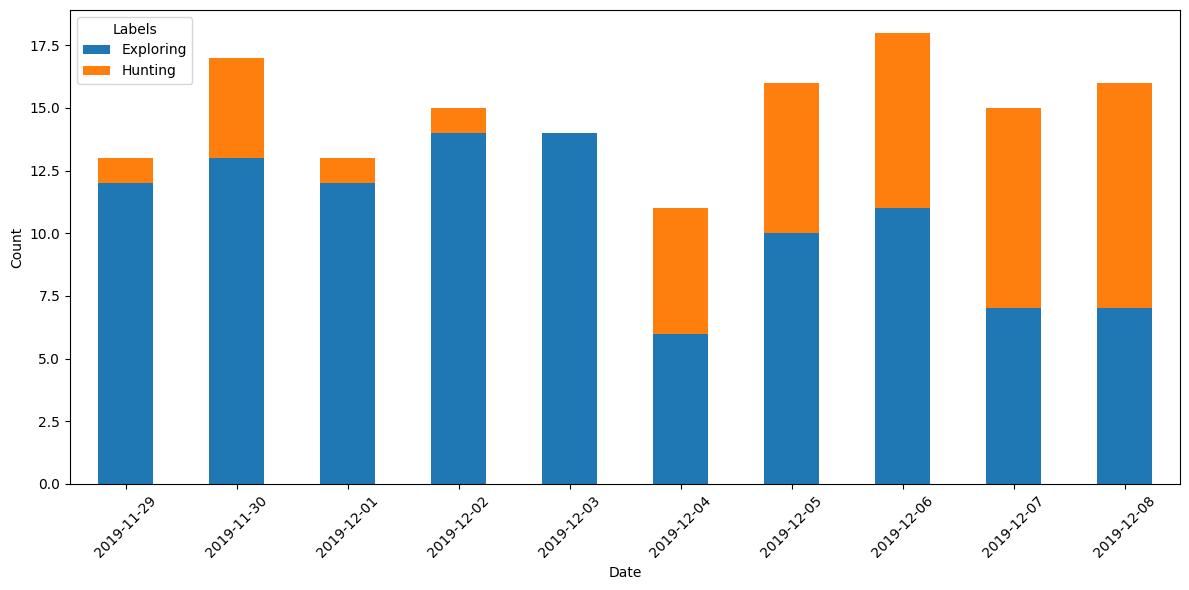

In [ ]:
import matplotlib.pyplot as plt

grouped_data.index = grouped_data.index.strftime('%Y-%m-%d')  # Assuming the index is datetime



# Plotting
grouped_data[:10].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='Labels')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_trajectories_by_labels(data):

    unique_dates = data['dates'].unique()
    unique_labels = data['labels_full'].unique()

    # Total number of plots
    total_plots = len(unique_dates) * len(unique_labels)
    cols = 5  # Number of columns in the subplot grid
    rows = total_plots // cols + (total_plots % cols > 0)  # Calculate rows needed

    fig, axs = plt.subplots(rows, cols, figsize=(20, 4 * rows), squeeze=False)
    axs = axs.flatten()

    plot_index = 0
    for date in unique_dates:
        for label in unique_labels:
            # Filter data for the current date and label
            subset = data[(data['dates'] == date) & (data['labels_full'] == label)]

            # Plot the trajectory
            axs[plot_index].plot(subset['location-long'], subset['location-lat'], marker='o', linestyle='-', label=label)
            axs[plot_index].set_title(f'{label} on {pd.to_datetime(date).strftime("%Y-%m-%d")}')
            axs[plot_index].legend()

            plot_index += 1

    # Hide any unused subplots
    for ax in axs[plot_index:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()




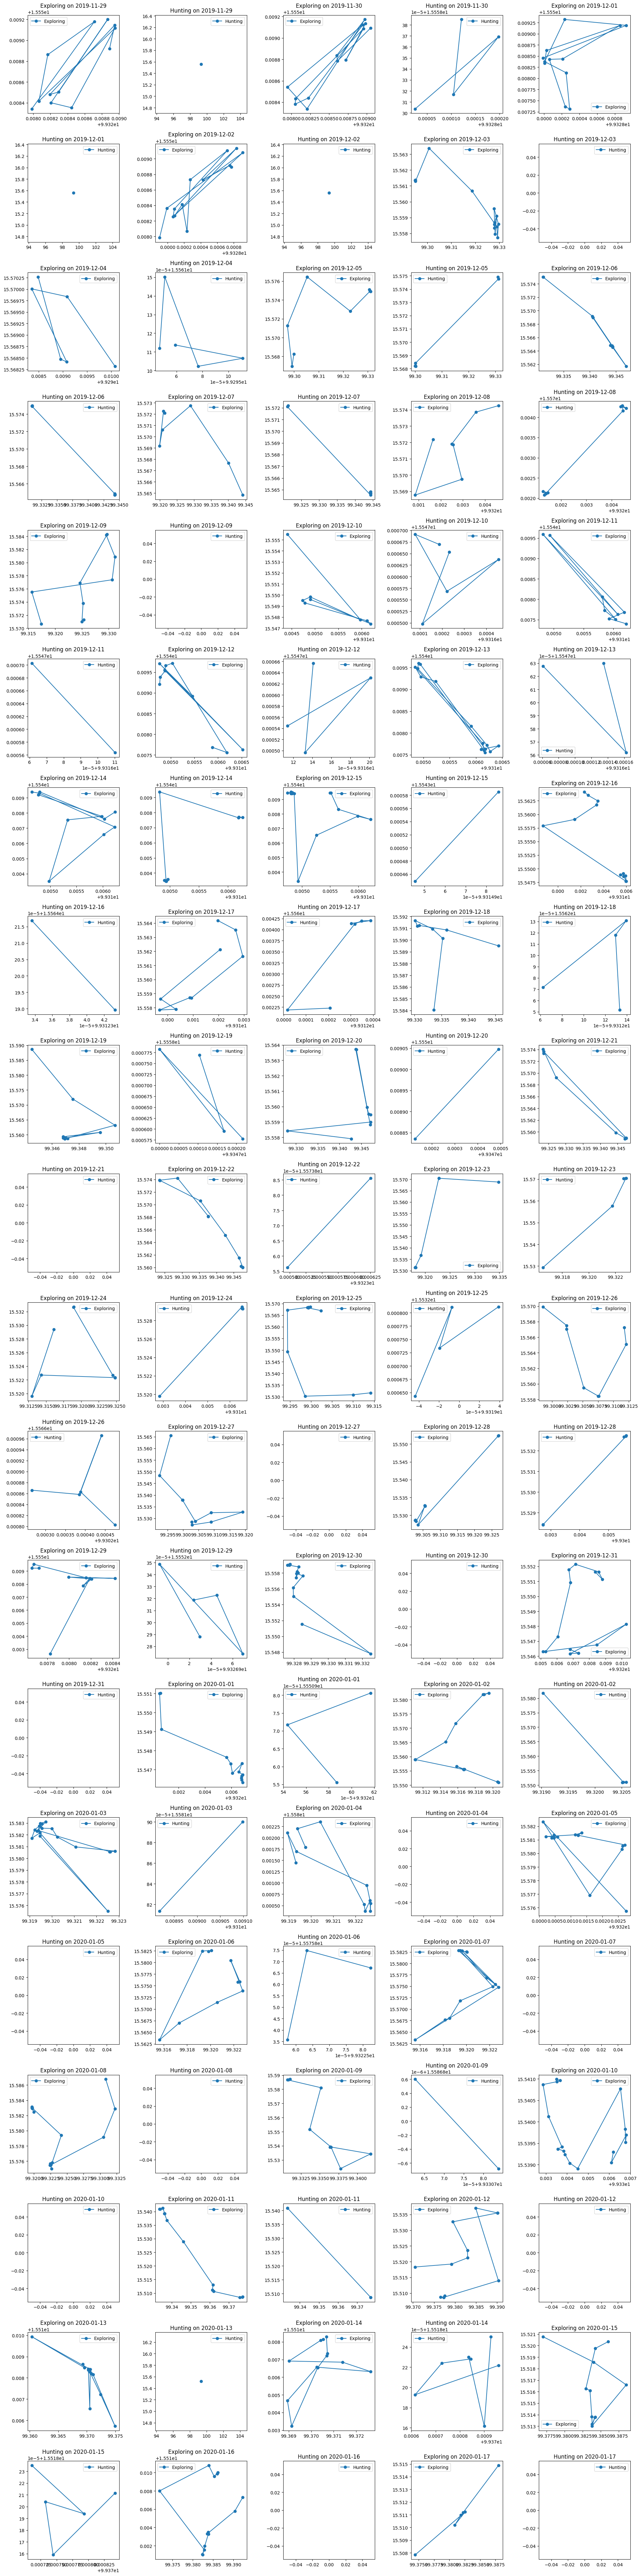

In [ ]:
plot_trajectories_by_labels(filtered_data)


# EXPLORING THE TRAJECTORIES BY 5 DAYS WINDOW

In [ ]:


data['dates'] = pd.to_datetime(data['dates'])

# Sort the DataFrame by the 'study-local-timestamp'
data = data.sort_values(by='dates')


In [ ]:
start_date = data['dates'].min()
end_date = start_date + pd.DateOffset(months=4)

In [ ]:
start_date

Timestamp('2019-09-13 00:00:00')

In [ ]:
end_date

Timestamp('2020-01-13 00:00:00')

In [ ]:

df_filtered = data[(data['dates'] >= '2019-09-13' ) & (data['dates'] <='2020-01-13')]


In [ ]:

df_filtered

ID  individual-local-identifier  location-lat  location-long  \
4     239853                       229032     15.561545      99.362636   
20    239872                       229032     15.549729      99.356794   
19    239870                       229032     15.560987      99.362097   
18    239869                       229032     15.561286      99.362011   
17    239868                       229032     15.562794      99.359438   
...      ...                          ...           ...            ...   
2457  242696                       229032     15.518398      99.370613   
2456  242695                       229032     15.519938      99.360354   
2455  242694                       229032     15.518479      99.369607   
2450  242689                       229032     15.518644      99.369310   
2462  242701                       229032     15.518410      99.370288   

             DEM      slope  temperature         Time_UTC  \
4     240.582275   2.669227           29  9/12/2019 20:00   
20    414.849426  18.608599           28  9/13/2019 16:00   
19    241.851410   3.205405           30  9/13/2019 13:00   
18    241.130661   3.152523           30  9/13/2019 12:00   
17    231.860580   4.870518           32  9/13/2019 11:00   
...          ...        ...          ...              ...   
2457  242.652115   2.650531           26   1/13/2020 0:00   
2456  365.797485  10.656165           26  1/12/2020 23:00   
2455  254.495606   4.866898           25  1/12/2020 22:00   
2450  256.141480   6.422774           27  1/12/2020 17:00   
2462  243.957703   4.657624           36   1/13/2020 5:00   

     study-local-timestamp  stepLength  ...  year  month  day  hour  daynight  \
4      2019-09-13 03:00:00    0.038666  ...  2019      9   13     3     night   
20     2019-09-13 23:00:00    0.018428  ...  2019      9   13    23     night   
19     2019-09-13 20:00:00    0.034499  ...  2019      9   13    20     night   
18     2019-09-13 19:00:00    0.322708  ...  2019      9   13    19     night   
17     2019-09-13 18:00:00    0.219761  ...  2019      9   13    18     night   
...                    ...         ...  ...   ...    ...  ...   ...       ...   
2457   2020-01-13 07:00:00    1.119223  ...  2020      1   13     7       day   
2456   2020-01-13 06:00:00    1.010808  ...  2020      1   13     6       day   
2455   2020-01-13 05:00:00    0.171317  ...  2020      1   13     5     night   
2450   2020-01-13 00:00:00    0.138058  ...  2020      1   13     0     night   
2462   2020-01-13 12:00:00    0.003660  ...  2020      1   13    12       day   

      drywet LABEL            Time_LMT labels_full      dates  
4        wet     E 2019-09-13 03:00:00   Exploring 2019-09-13  
20       wet     E 2019-09-13 23:00:00   Exploring 2019-09-13  
19       wet     E 2019-09-13 20:00:00   Exploring 2019-09-13  
18       wet     E 2019-09-13 19:00:00   Exploring 2019-09-13  
17       wet     E 2019-09-13 18:00:00   Exploring 2019-09-13  
...      ...   ...                 ...         ...        ...  
2457     dry     E 2020-01-13 07:00:00   Exploring 2020-01-13  
2456     dry     E 2020-01-13 06:00:00   Exploring 2020-01-13  
2455     dry     E 2020-01-13 05:00:00   Exploring 2020-01-13  
2450     dry     E 2020-01-13 00:00:00   Exploring 2020-01-13  
2462     dry     E 2020-01-13 12:00:00   Exploring 2020-01-13  

[1786 rows x 22 columns]

In [ ]:

start_date = data['dates'].min()


data['days_from_start'] = (data['dates'] - start_date).dt.days

data['segment'] = data['days_from_start'] // 5 + 1
data

ID  individual-local-identifier  location-lat  location-long  \
4     239853                       229032     15.561545      99.362636   
20    239872                       229032     15.549729      99.356794   
19    239870                       229032     15.560987      99.362097   
18    239869                       229032     15.561286      99.362011   
17    239868                       229032     15.562794      99.359438   
...      ...                          ...           ...            ...   
2544  242790                       229032     15.514883      99.387983   
2545  242791                       229032     15.511186      99.382266   
2546  242792                       229032     15.510966      99.381889   
2549  242796                       229032     15.510191      99.380891   
2555  242802                       229032     15.507849      99.374454   

             DEM      slope  temperature         Time_UTC  \
4     240.582275   2.669227           29  9/12/2019 20:00   
20    414.849426  18.608599           28  9/13/2019 16:00   
19    241.851410   3.205405           30  9/13/2019 13:00   
18    241.130661   3.152523           30  9/13/2019 12:00   
17    231.860580   4.870518           32  9/13/2019 11:00   
...          ...        ...          ...              ...   
2544  198.212250   2.986848           24   1/17/2020 1:00   
2545  215.073593   1.624841           27   1/17/2020 2:00   
2546  214.490082   2.092113           29   1/17/2020 3:00   
2549  214.723572   1.715222           34   1/17/2020 7:00   
2555  247.430481   6.060933           27  1/17/2020 13:00   

     study-local-timestamp  stepLength  ...  day  hour  daynight  drywet  \
4      2019-09-13 03:00:00    0.038666  ...   13     3     night     wet   
20     2019-09-13 23:00:00    0.018428  ...   13    23     night     wet   
19     2019-09-13 20:00:00    0.034499  ...   13    20     night     wet   
18     2019-09-13 19:00:00    0.322708  ...   13    19     night     wet   
17     2019-09-13 18:00:00    0.219761  ...   13    18     night     wet   
...                    ...         ...  ...  ...   ...       ...     ...   
2544   2020-01-17 08:00:00    0.518421  ...   17     8       day     dry   
2545   2020-01-17 09:00:00    0.737915  ...   17     9       day     dry   
2546   2020-01-17 10:00:00    0.047179  ...   17    10       day     dry   
2549   2020-01-17 14:00:00    0.214841  ...   17    14       day     dry   
2555   2020-01-17 20:00:00    0.946810  ...   17    20     night     dry   

      LABEL            Time_LMT labels_full      dates days_from_start segment  
4         E 2019-09-13 03:00:00   Exploring 2019-09-13               0       1  
20        E 2019-09-13 23:00:00   Exploring 2019-09-13               0       1  
19        E 2019-09-13 20:00:00   Exploring 2019-09-13               0       1  
18        E 2019-09-13 19:00:00   Exploring 2019-09-13               0       1  
17        E 2019-09-13 18:00:00   Exploring 2019-09-13               0       1  
...     ...                 ...         ...        ...             ...     ...  
2544      E 2020-01-17 08:00:00   Exploring 2020-01-17             126      26  
2545      E 2020-01-17 09:00:00   Exploring 2020-01-17             126      26  
2546      E 2020-01-17 10:00:00   Exploring 2020-01-17             126      26  
2549      E 2020-01-17 14:00:00   Exploring 2020-01-17             126      26  
2555      E 2020-01-17 20:00:00   Exploring 2020-01-17             126      26  

[1842 rows x 24 columns]

In [ ]:
# Filter for entries in segment 1
segment_1_data = data[data['segment'] == 1]

# Display the filtered DataFrame
segment_1_data


ID  individual-local-identifier  location-lat  location-long  \
4   239853                       229032     15.561545      99.362636   
20  239872                       229032     15.549729      99.356794   
19  239870                       229032     15.560987      99.362097   
18  239869                       229032     15.561286      99.362011   
17  239868                       229032     15.562794      99.359438   
..     ...                          ...           ...            ...   
90  239949                       229032     15.547431      99.363664   
88  239947                       229032     15.548243      99.363439   
87  239946                       229032     15.547357      99.363872   
86  239944                       229032     15.546876      99.364696   
93  239953                       229032     15.543801      99.365026   

           DEM      slope  temperature         Time_UTC study-local-timestamp  \
4   240.582275   2.669227           29  9/12/2019 20:00   2019-09-13 03:00:00   
20  414.849426  18.608599           28  9/13/2019 16:00   2019-09-13 23:00:00   
19  241.851410   3.205405           30  9/13/2019 13:00   2019-09-13 20:00:00   
18  241.130661   3.152523           30  9/13/2019 12:00   2019-09-13 19:00:00   
17  231.860580   4.870518           32  9/13/2019 11:00   2019-09-13 18:00:00   
..         ...        ...          ...              ...                   ...   
90  425.588074  11.023165           27   9/17/2019 0:00   2019-09-17 07:00:00   
88  422.427765  14.701925           27  9/16/2019 22:00   2019-09-17 05:00:00   
87  422.732971  11.801459           26  9/16/2019 21:00   2019-09-17 04:00:00   
86  408.639496  15.772148           29  9/16/2019 18:00   2019-09-17 01:00:00   
93  436.838196  13.442993           34   9/17/2019 4:00   2019-09-17 11:00:00   

    stepLength  ...  day  hour  daynight  drywet  LABEL            Time_LMT  \
4     0.038666  ...   13     3     night     wet      E 2019-09-13 03:00:00   
20    0.018428  ...   13    23     night     wet      E 2019-09-13 23:00:00   
19    0.034499  ...   13    20     night     wet      E 2019-09-13 20:00:00   
18    0.322708  ...   13    19     night     wet      E 2019-09-13 19:00:00   
17    0.219761  ...   13    18     night     wet      E 2019-09-13 18:00:00   
..         ...  ...  ...   ...       ...     ...    ...                 ...   
90    0.097456  ...   17     7       day     wet      E 2019-09-17 07:00:00   
88    0.108907  ...   17     5     night     wet      E 2019-09-17 05:00:00   
87    0.107165  ...   17     4     night     wet      E 2019-09-17 04:00:00   
86    0.005268  ...   17     1     night     wet      E 2019-09-17 01:00:00   
93    0.027101  ...   17    11       day     wet      H 2019-09-17 11:00:00   

   labels_full      dates days_from_start segment  
4    Exploring 2019-09-13               0       1  
20   Exploring 2019-09-13               0       1  
19   Exploring 2019-09-13               0       1  
18   Exploring 2019-09-13               0       1  
17   Exploring 2019-09-13               0       1  
..         ...        ...             ...     ...  
90   Exploring 2019-09-17               4       1  
88   Exploring 2019-09-17               4       1  
87   Exploring 2019-09-17               4       1  
86   Exploring 2019-09-17               4       1  
93     Hunting 2019-09-17               4       1  

[70 rows x 24 columns]

In [ ]:
segment_counts = data.groupby(['segment', 'labels_full']).size().reset_index(name='count')
segment_counts

segment labels_full  count
0         1   Exploring     56
1         1     Hunting     14
2         2   Exploring     41
3         2     Hunting     33
4         3   Exploring     62
5         3     Hunting     23
6         4   Exploring     59
7         4     Hunting     13
8         5   Exploring     58
9         5     Hunting     13
10        6   Exploring     73
11        6     Hunting     11
12        7   Exploring     45
13        7     Hunting     15
14        8   Exploring     69
15        8     Hunting      9
16        9   Exploring     71
17        9     Hunting     16
18       10   Exploring     55
19       10     Hunting     15
20       11   Exploring     51
21       11     Hunting     13
22       12   Exploring     52
23       12     Hunting     20
24       13   Exploring     49
25       13     Hunting     20
26       14   Exploring     50
27       14     Hunting     24
28       15   Exploring     59
29       15     Hunting     13
30       16   Exploring     59
31       16     Hunting     16
32       17   Exploring     55
33       17     Hunting     19
34       18   Exploring     41
35       18     Hunting     25
36       19   Exploring     62
37       19     Hunting     19
38       20   Exploring     46
39       20     Hunting     16
40       21   Exploring     44
41       21     Hunting     21
42       22   Exploring     57
43       22     Hunting     10
44       23   Exploring     70
45       23     Hunting      9
46       24   Exploring     66
47       24     Hunting      5
48       25   Exploring     63
49       25     Hunting     17
50       26   Exploring     20

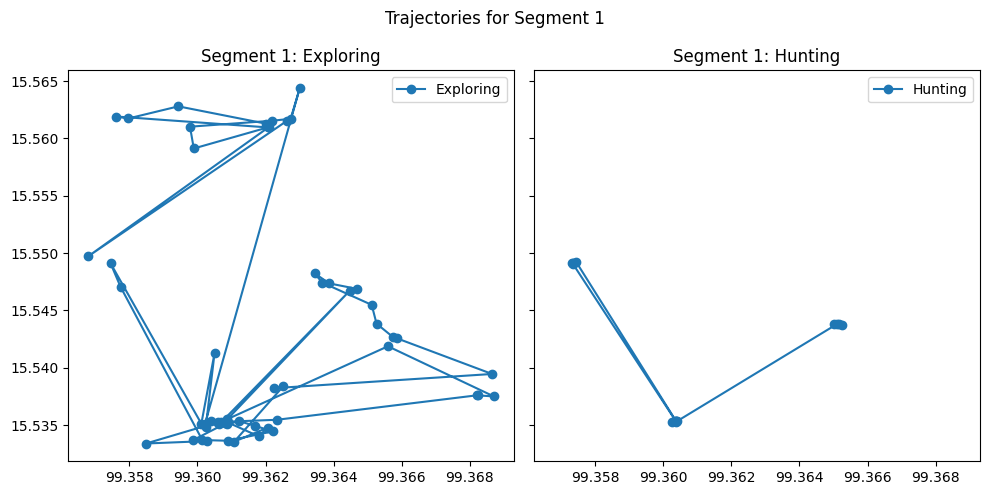

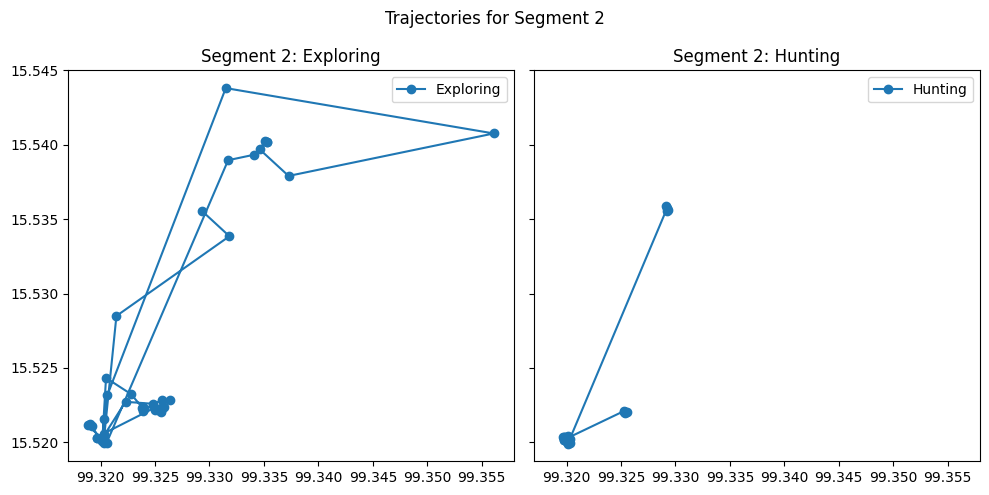

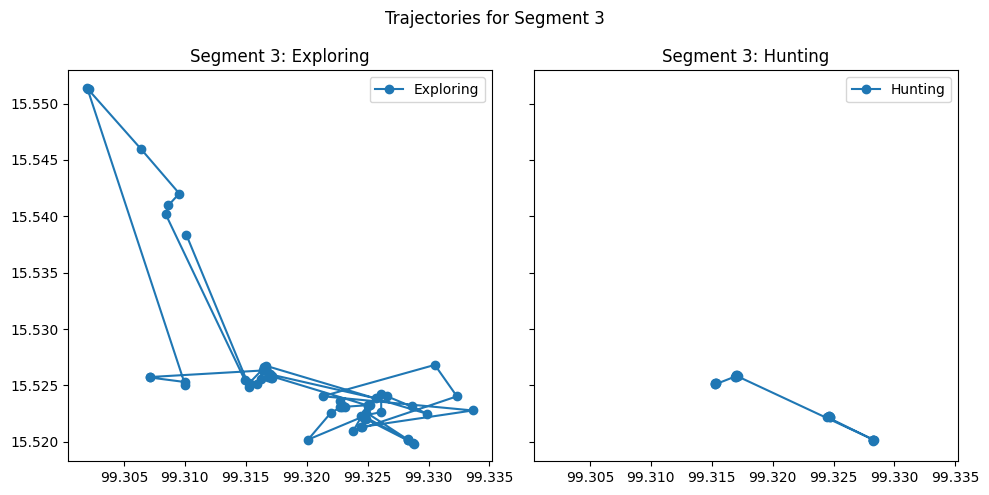

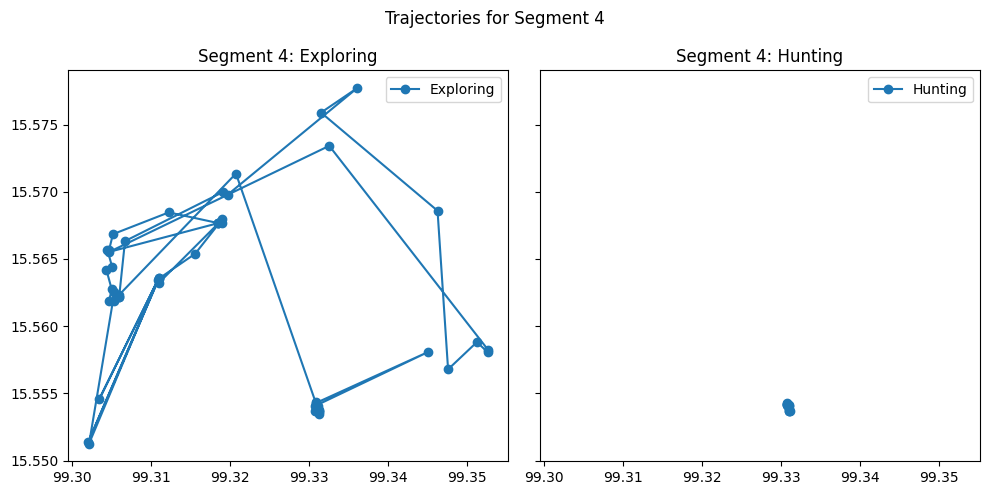

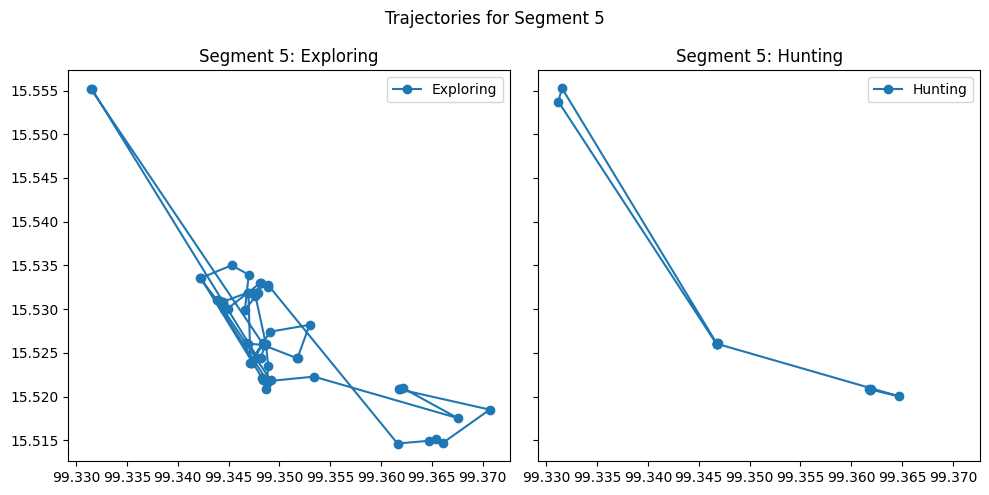

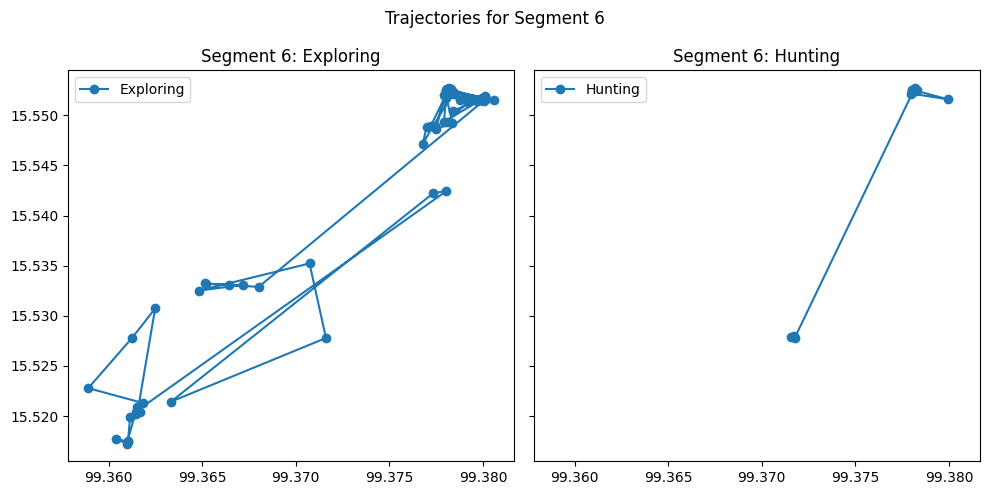

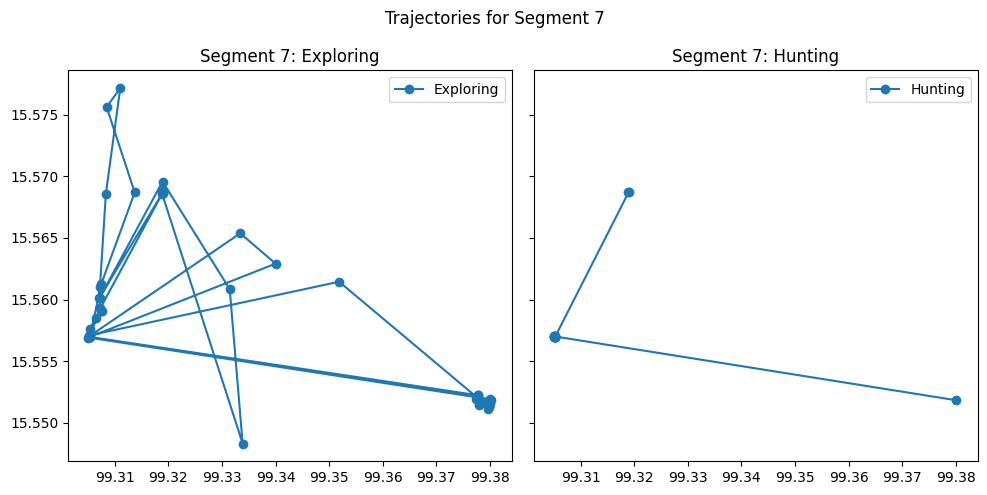

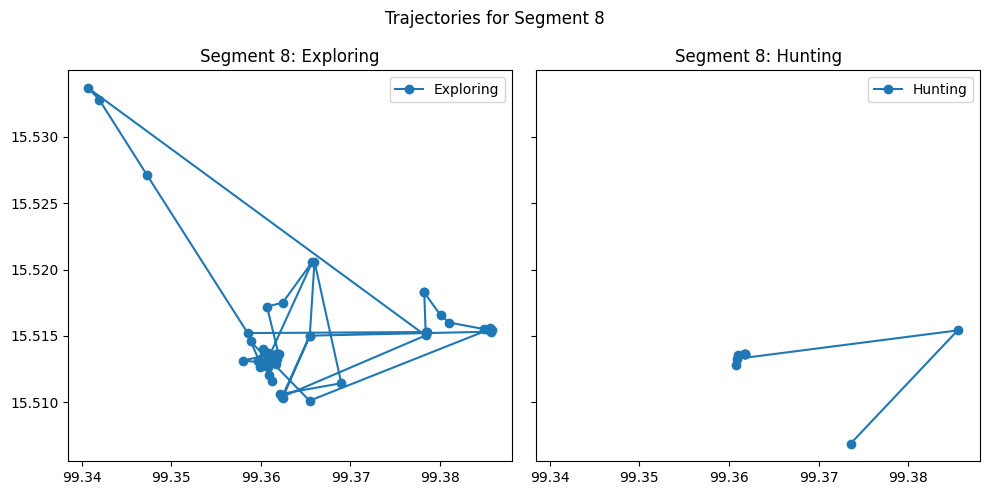

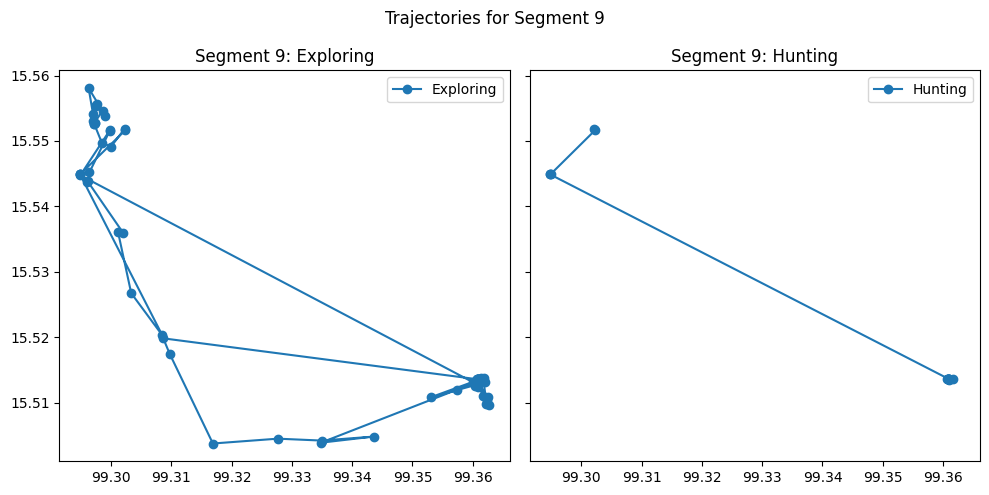

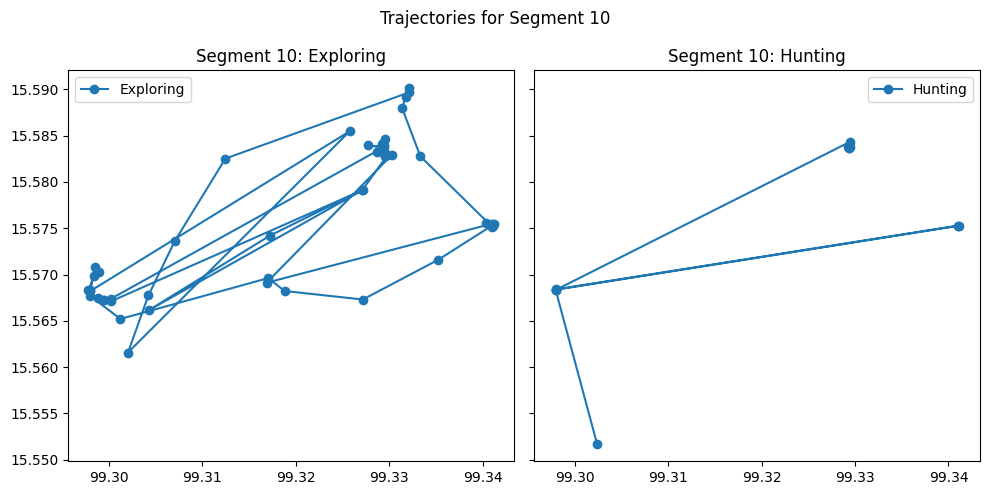

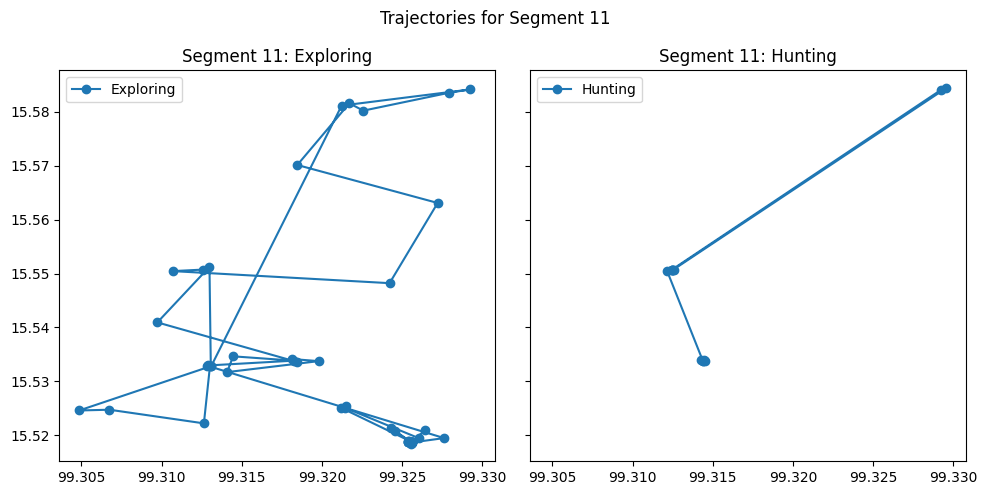

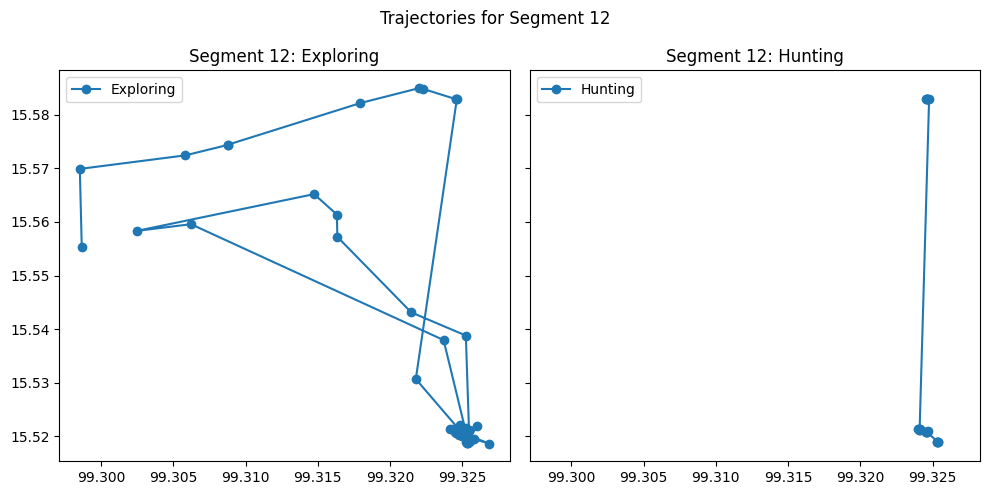

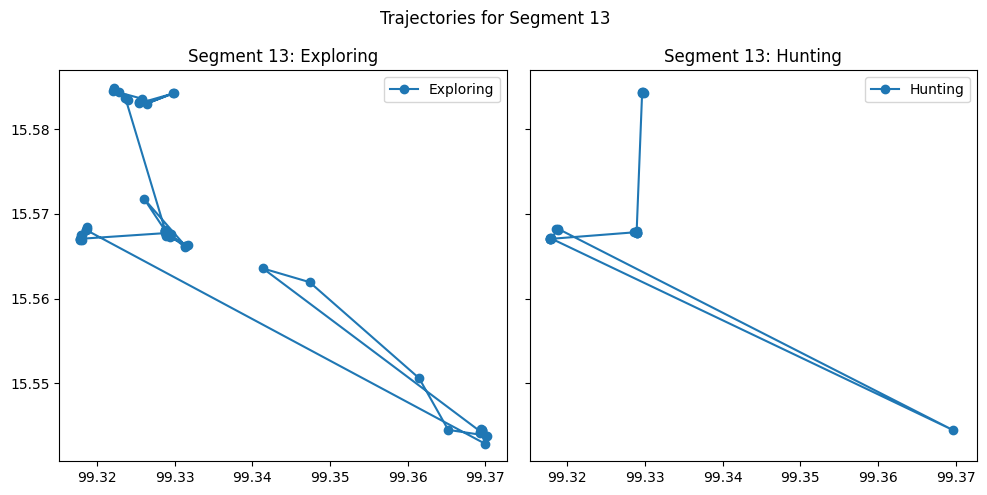

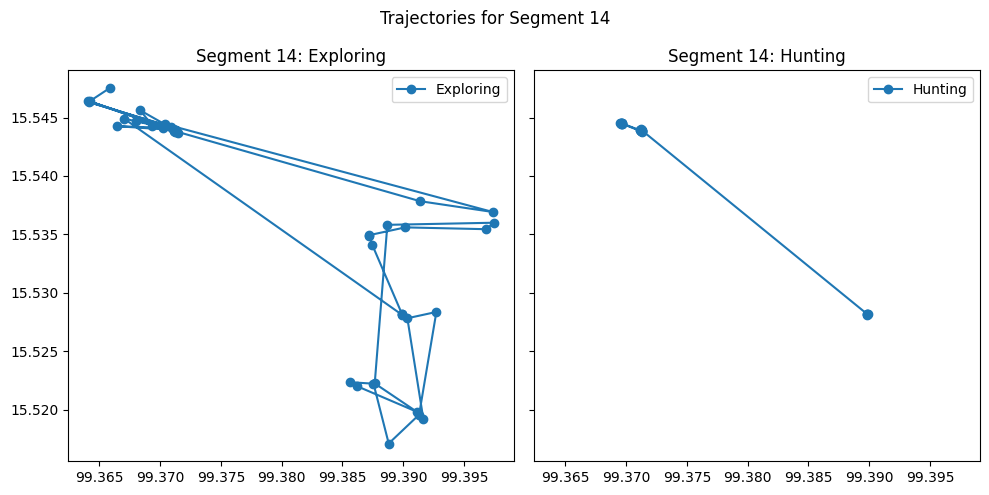

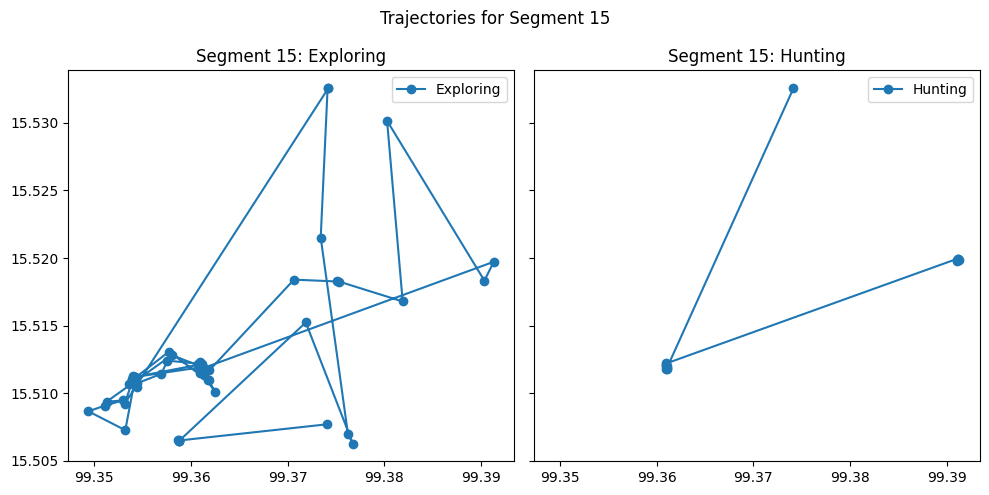

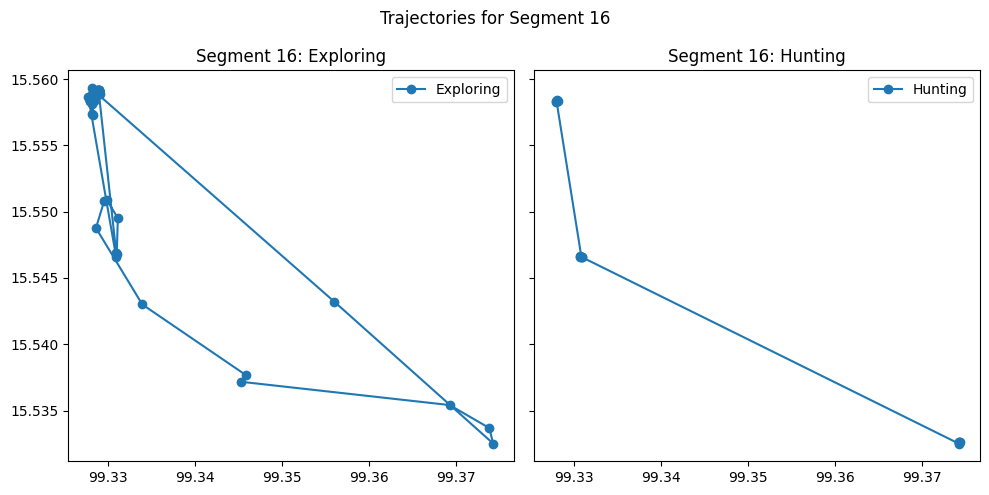

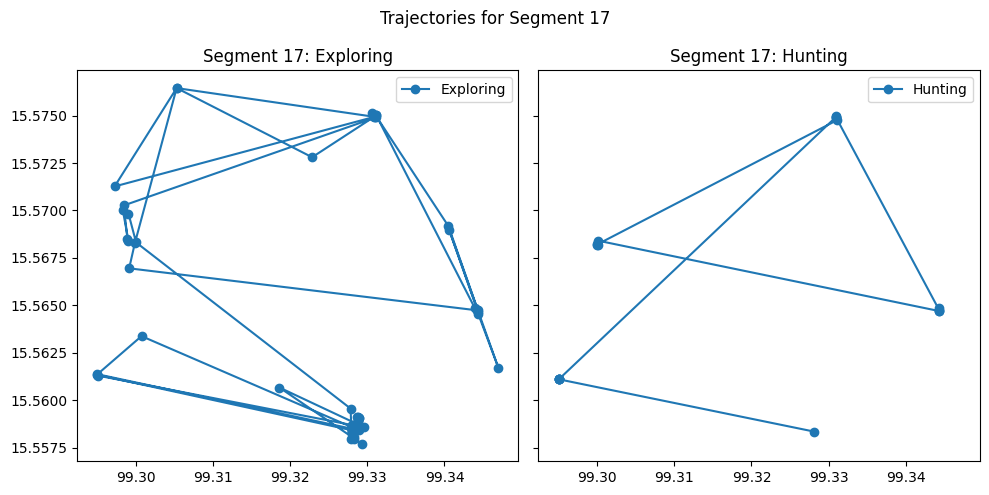

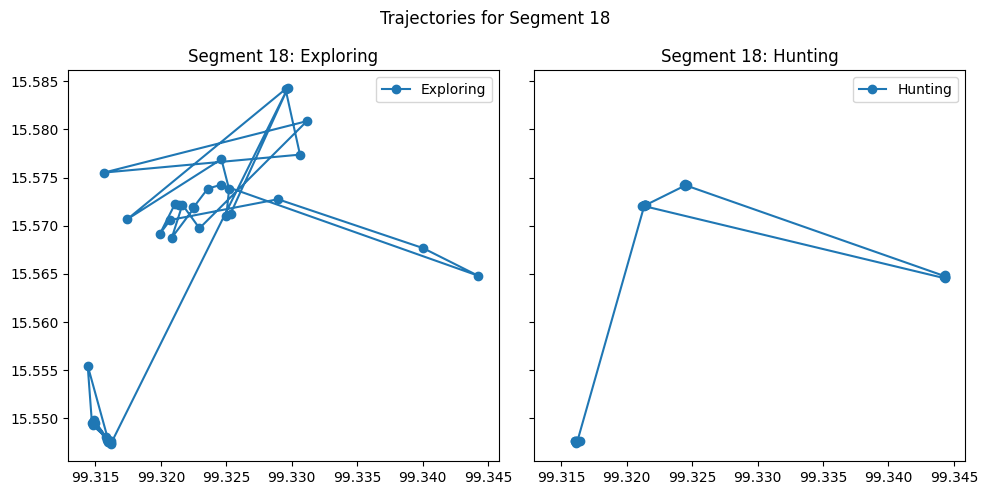

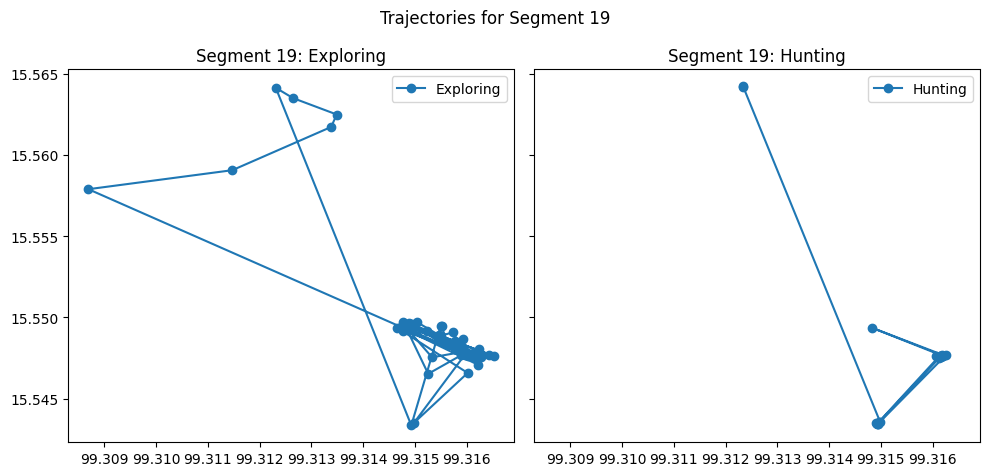

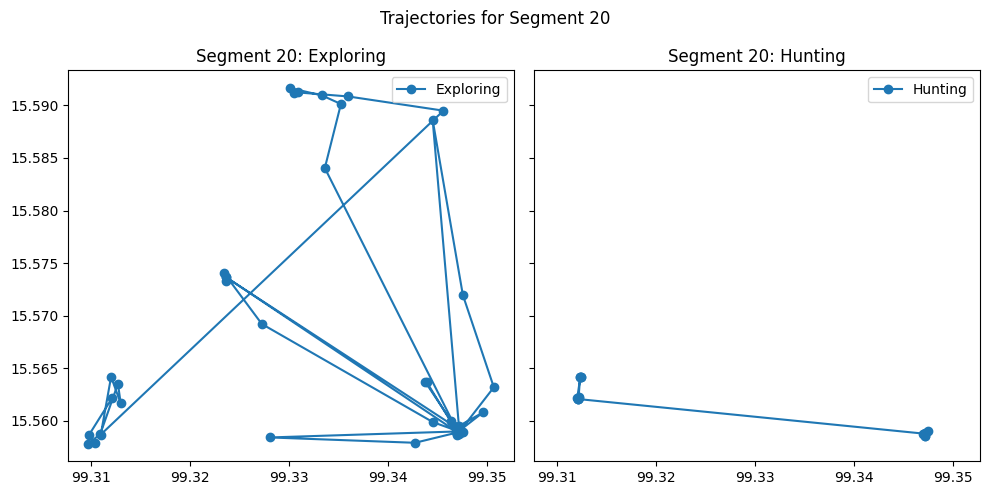

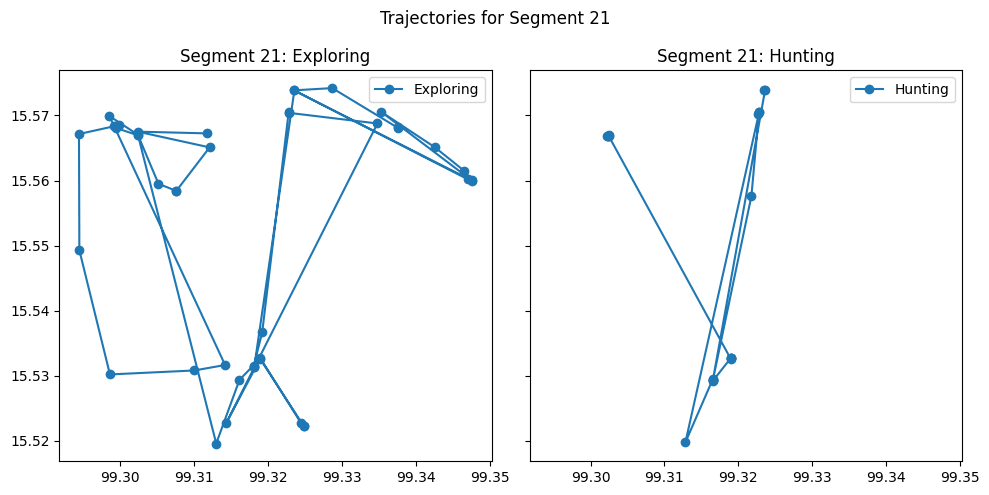

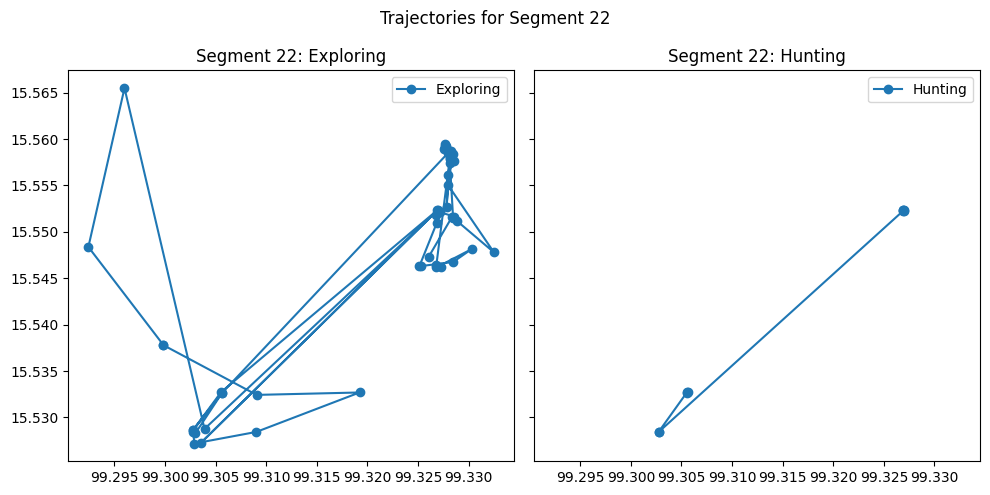

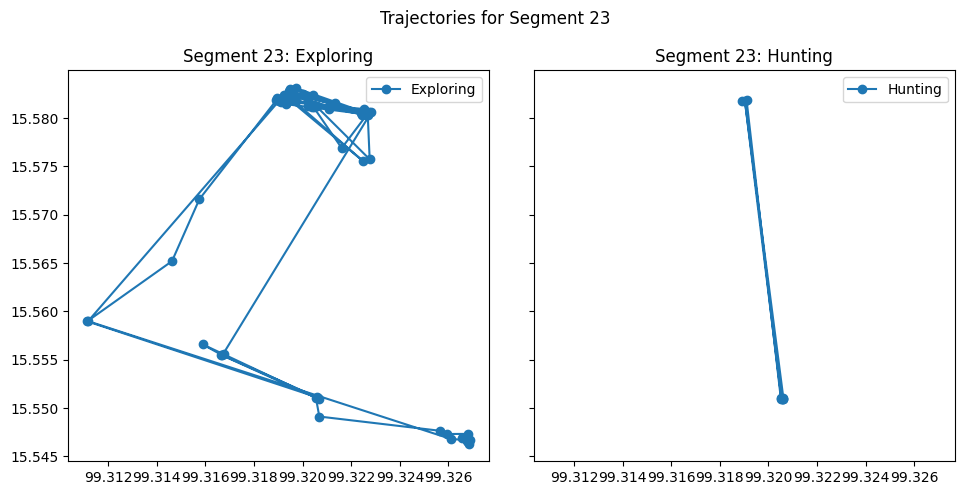

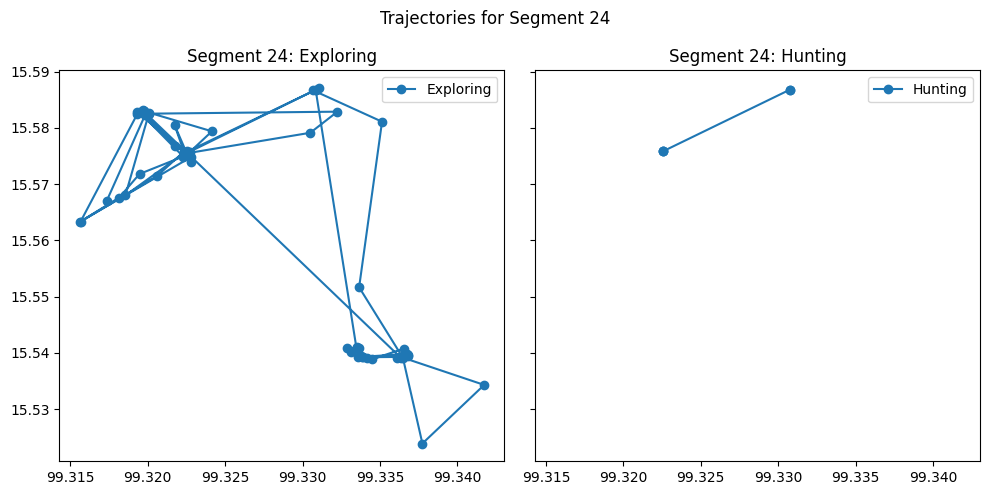

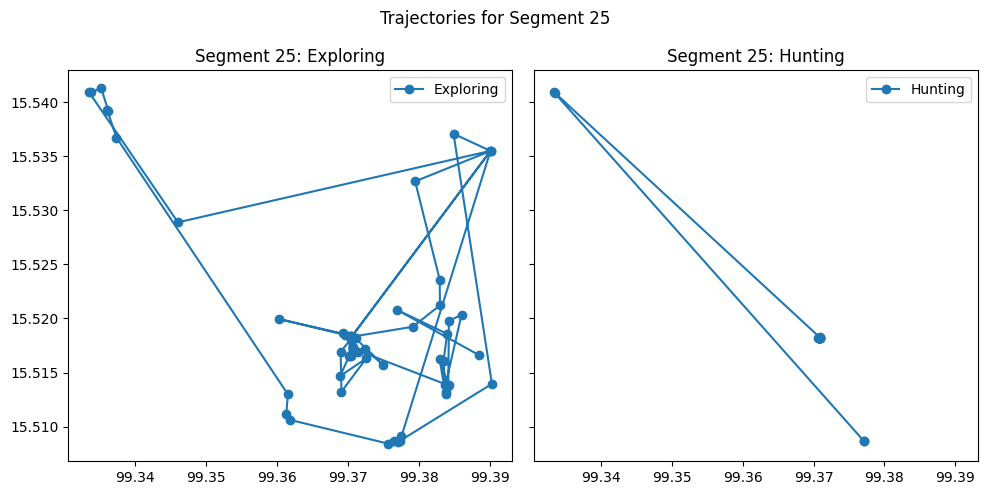

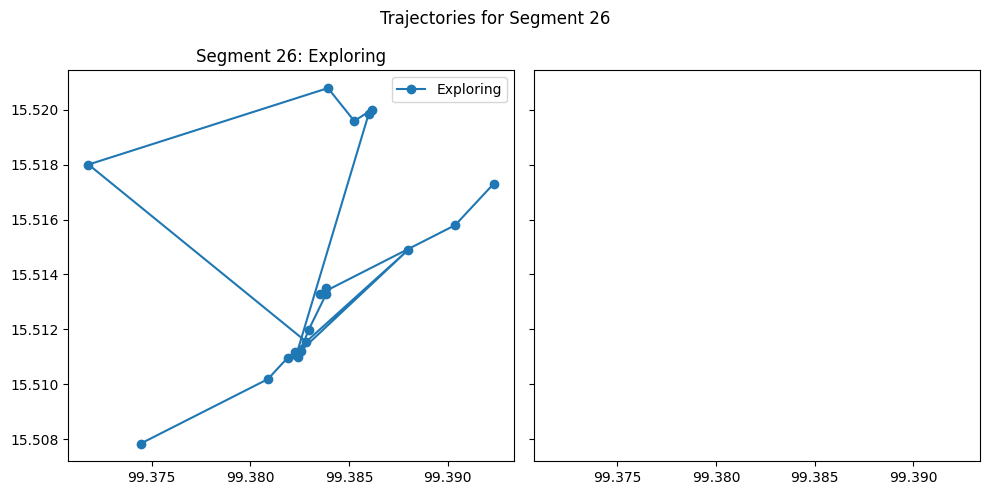

In [ ]:
import matplotlib.pyplot as plt

def plot_trajectories_by_segment_and_label(data):

    segments = sorted(data['segment'].unique())
    labels = data['labels_full'].unique()

    for segment in segments:
        fig, axs = plt.subplots(1, len(labels), figsize=(10,5), sharex=True, sharey=True)

        if len(labels) == 1:
            axs = [axs]


        for i, label in enumerate(labels):
            subset = data[(data['segment'] == segment) & (data['labels_full'] == label)]

            if not subset.empty:
                axs[i].plot(subset['location-long'], subset['location-lat'], marker='o', linestyle='-', label=label)
                axs[i].set_title(f'Segment {segment}: {label}')
                axs[i].legend()


        plt.suptitle(f'Trajectories for Segment {segment}')
        plt.tight_layout()
        plt.show()


plot_trajectories_by_segment_and_label(data)


# Polygons for 5 days window

In [ ]:
import numpy as np

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull

def plot_trajectories_by_segment_and_label_with_hulls(data):
    segments = sorted(data['segment'].unique())
    labels = data['labels_full'].unique()
    hull_data = []  #  storing the hull data

    for segment in segments:
        fig, axs = plt.subplots(1, len(labels), figsize=(10, 5), sharex=True, sharey=True)

        if len(labels) == 1:
            axs = [axs]

        for i, label in enumerate(labels):
            subset = data[(data['segment'] == segment) & (data['labels_full'] == label)]

            if not subset.empty:
                longitudes = subset['location-long'].values
                latitudes = subset['location-lat'].values
                axs[i].plot(longitudes, latitudes, marker='o', linestyle='-', label=label)

                # Calculate and plot the convex hull if there are enough points
                if len(longitudes) > 2:
                    points = np.vstack((longitudes, latitudes))
                    hull = ConvexHull(points)
                    hull_points = points[hull.vertices]
                    hull_data.append({'segment': segment, 'label': label, 'hull_points': hull_points})  # Store hull data

                    for simplex in hull.simplices:
                        axs[i].plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=2)  # Plot hull

                axs[i].set_title(f'Segment {segment}: {label}')
                axs[i].legend()

        plt.suptitle(f'Trajectories for Segment {segment}')
        plt.tight_layout()
        plt.show()

    return hull_data  # Return the collected hull data


In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

def convert_hulls_to_shapefile(hull_data):
    hull_polygons = [Polygon(item['hull_points']) for item in hull_data]
    hull_attributes = [{'segment': item['segment'], 'label': item['label']} for item in hull_data]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(hull_attributes, epsg = 4326,  geometry=hull_polygons)

    # Export to a shapefile
    #gdf.to_file("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger_shapefile.shp")




In [ ]:
#result = plot_trajectories_by_segment_and_label_with_hulls(data)

#convert_hulls_to_shapefile(result)


In [ ]:
gdf = gpd.read_file("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger_shapefile.shp")
#gdf = gdf.set_crs(epsg=4326)
#gdf=gdf.to_crs(epsg=32647)


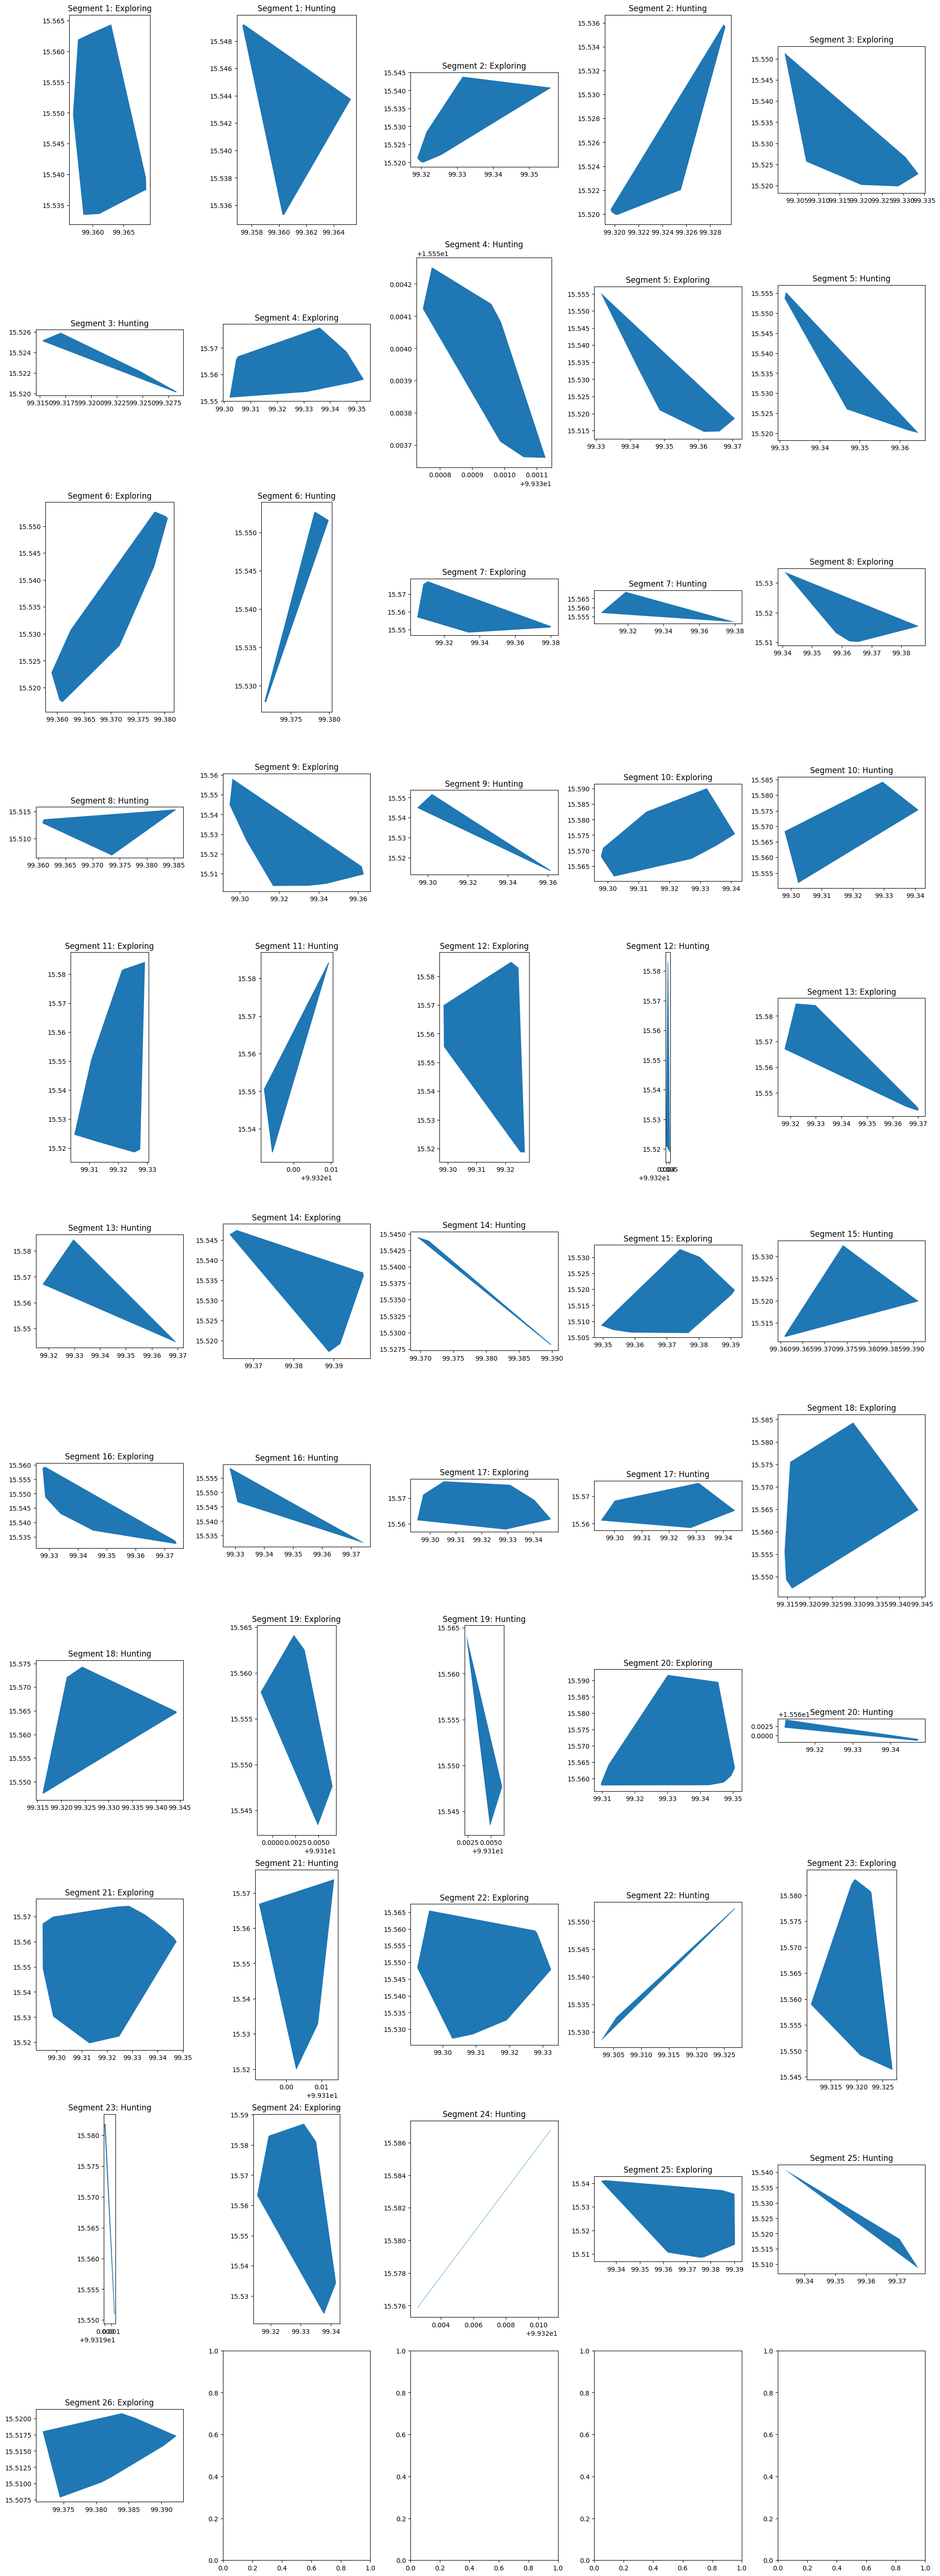

In [ ]:

unique_combinations = gdf.drop_duplicates(subset=['segment', 'label'])
total_combinations = len(unique_combinations)

# Define subplot grid
num_cols = 5
num_rows = total_combinations // num_cols + (total_combinations % num_cols > 0)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), constrained_layout=True)
axes = axes.flatten()

subplot_index = 0
for segment in sorted(gdf['segment'].unique()):
    for label in gdf[gdf['segment'] == segment]['label'].unique():
        ax = axes[subplot_index]
        data_to_plot = gdf[(gdf['segment'] == segment) & (gdf['label'] == label)]
        data_to_plot.plot(ax=ax)

        ax.set_title(f'Segment {segment}: {label}')
        ax.axis('on')

        subplot_index += 1



plt.show()


<ipython-input-78-369b65c003f7>:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


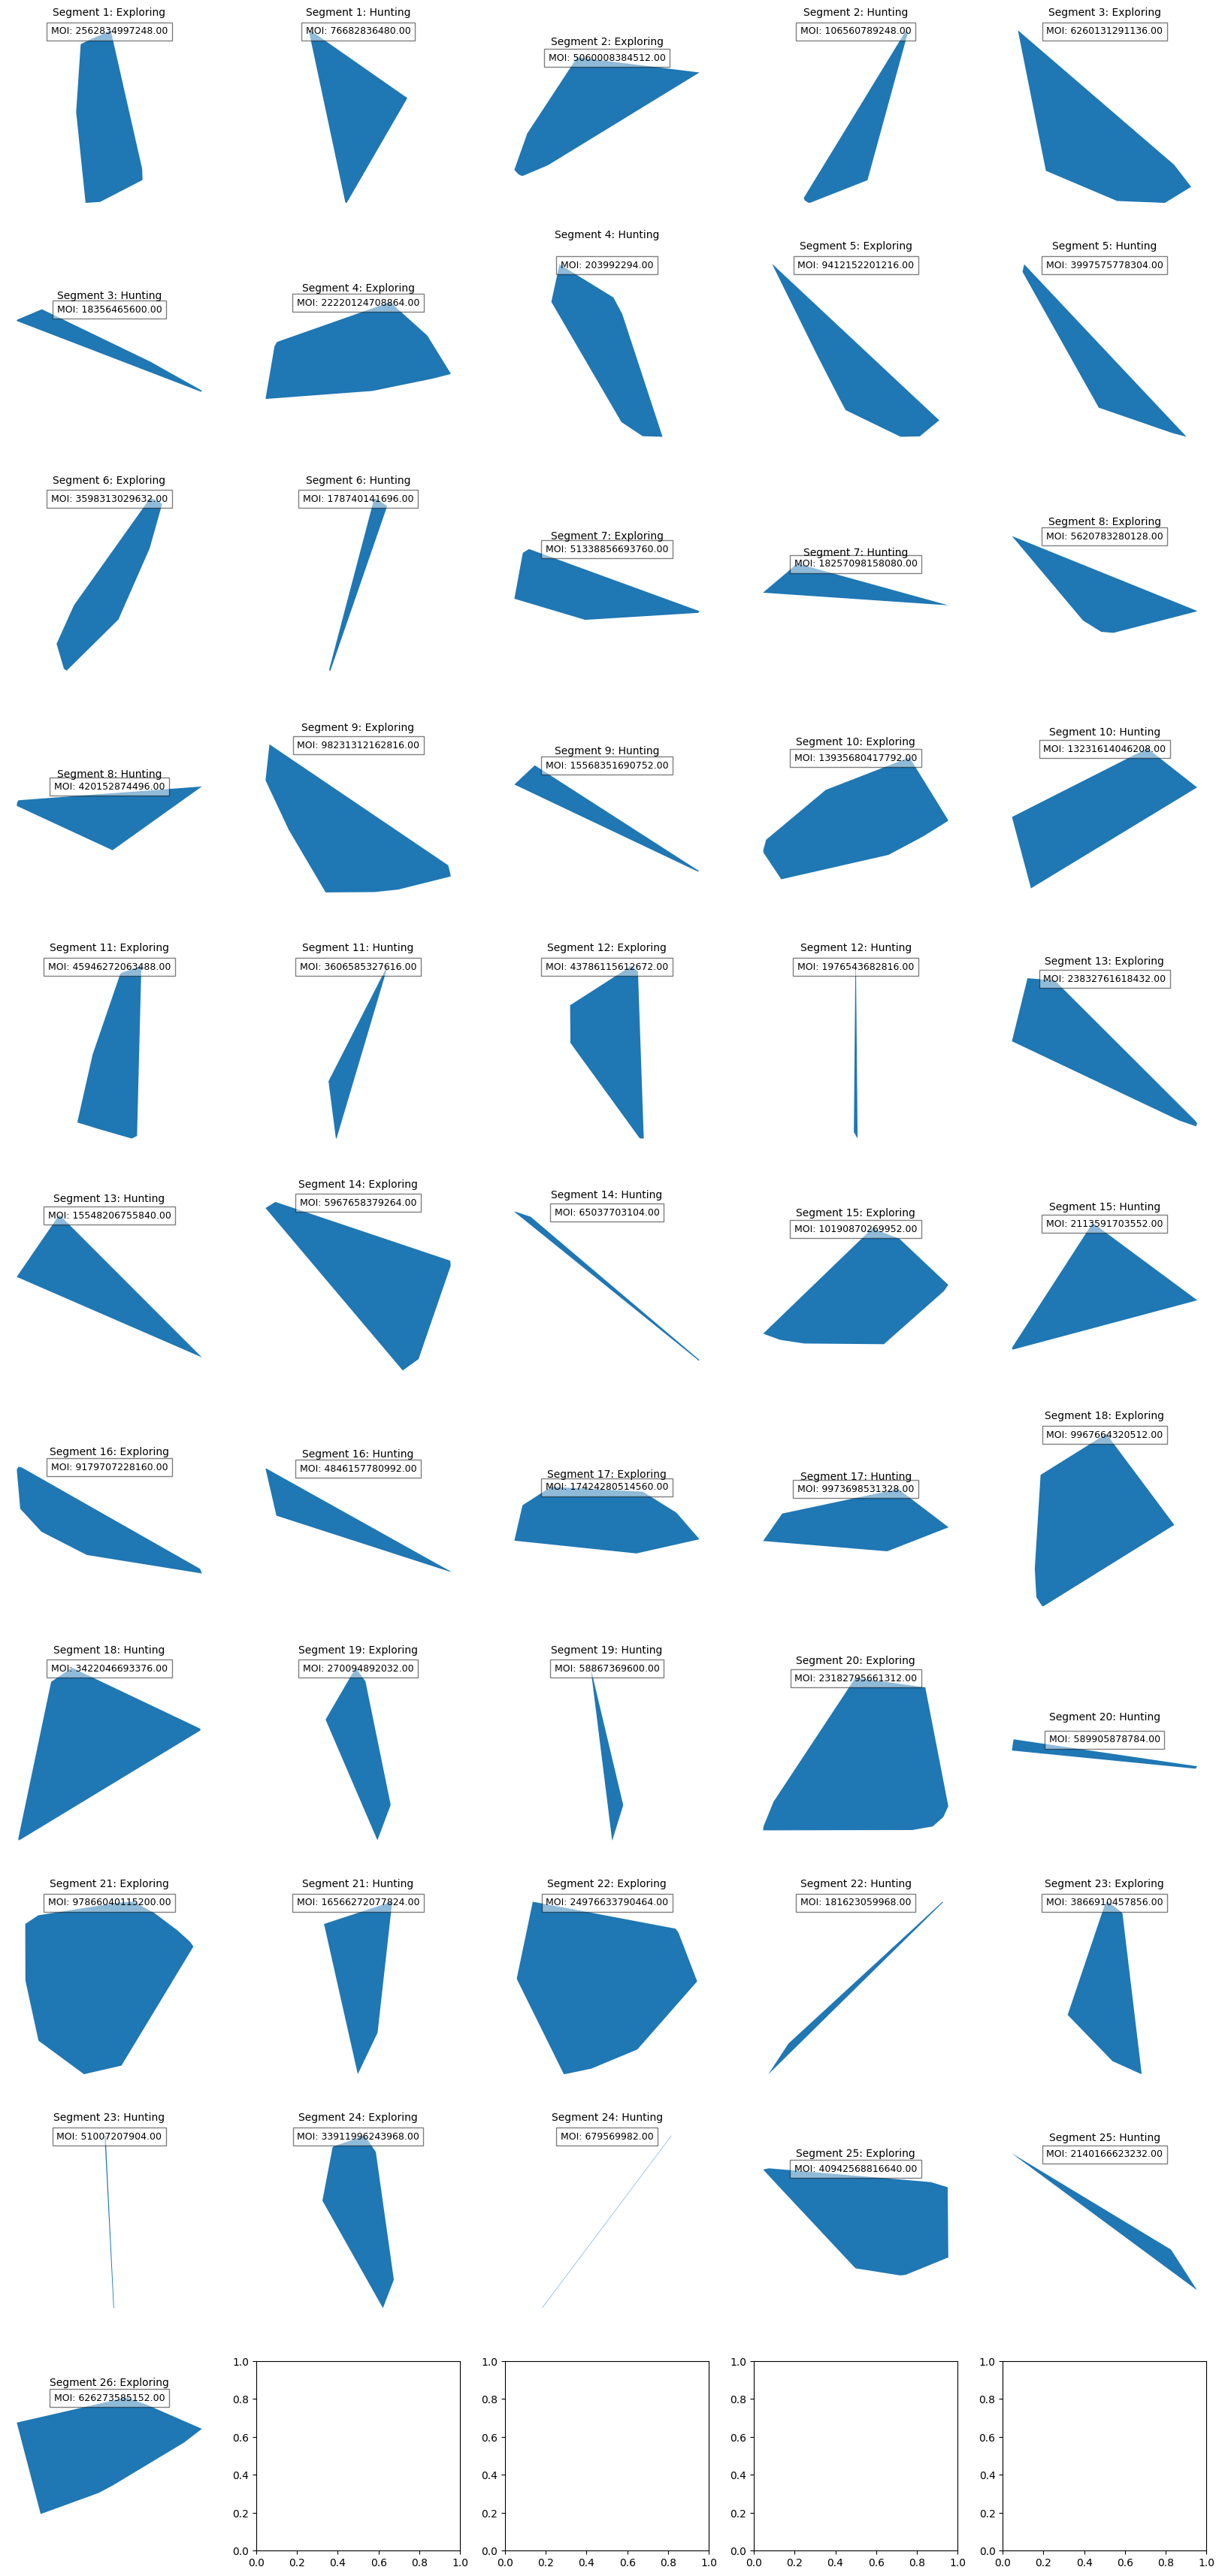

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pyproj
from shapely.geometry import Polygon


unique_combinations = gdf.drop_duplicates(subset=['segment', 'label'])
total_combinations = len(unique_combinations)

# Define subplot grid
num_cols = 5
num_rows = total_combinations // num_cols + (total_combinations % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), constrained_layout=True)
axes = axes.flatten()

subplot_index = 0
for segment in sorted(gdf['segment'].unique()):
    for label in sorted(gdf[gdf['segment'] == segment]['label'].unique()):
        ax = axes[subplot_index]
        data_to_plot = gdf[(gdf['segment'] == segment) & (gdf['label'] == label)]
        data_to_plot.plot(ax=ax)

        # Calculate the moment of inertia for the first geometry within the segment-label combination
        for _, row in data_to_plot.iterrows():
            geom = row.geometry
            if geom.is_empty:
                continue  # Skip empty geometries
            vertices = get_vertices_from_geom(geom)  # Make sure this function is adapted to handle your geometries correctly
            moi = calculate_moment_of_inertia(vertices)
            ax.text(0.5, 0.95, f'MOI: {moi:.2f}', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
            break  # Break after calculating for the first non-empty geometry

        ax.set_title(f'Segment {segment}: {label}', fontsize=10)
        ax.axis('off')
        subplot_index += 1

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt

def latlon_to_utm(lat, lon):
    """Convert latitude and longitude to UTM coordinates."""
    zone_number = int((lon + 180) / 6) + 1
    utm_proj = pyproj.Proj(proj='utm', zone=zone_number, ellps='WGS84', datum='WGS84')
    utm_x, utm_y = utm_proj(lon, lat)
    return utm_x, utm_y

def get_vertices_from_geom(geom):
    """Extracts vertices from a Polygon or MultiPolygon geometry, converts them to UTM."""
    if geom.geom_type == 'Polygon':
        coords = geom.exterior.coords
    elif geom.geom_type == 'MultiPolygon':
        coords = geom.geoms[0].exterior.coords  # Simplification for example
    else:
        raise ValueError("Unsupported geometry type")
    vertices = [latlon_to_utm(lat, lon) for lon, lat in coords]
    return vertices

def calculate_centroid(vertices):
    """Calculate the centroid of a polygon given by vertices."""
    x_list, y_list = zip(*vertices)
    n = len(vertices)
    x = sum(x_list) / n
    y = sum(y_list) / n
    return x, y

def calculate_area(vertices):
    """Calculate the area of a polygon given by vertices."""
    area = 0.0
    n = len(vertices)
    for i in range(n):
        j = (i + 1) % n
        area += vertices[i][0] * vertices[j][1]
        area -= vertices[j][0] * vertices[i][1]
    area = abs(area) / 2.0
    return area

def calculate_moment_of_inertia(vertices):
    """Calculate the moment of inertia for a polygon."""
    if not np.array_equal(vertices[0], vertices[-1]):
        vertices.append(vertices[0])
    n = len(vertices) - 1
    I_g = 0
    for i in range(n):
        x_i, y_i = vertices[i]
        x_next, y_next = vertices[(i + 1) % n]
        common_term = x_i * y_next - x_next * y_i
        I_g += common_term * (x_i**2 + x_i * x_next + x_next**2 + y_i**2 + y_i * y_next + y_next**2)
    I_g *= 1/12
    centroid_x, centroid_y = calculate_centroid(vertices)
    A = calculate_area(vertices)
    d_x, d_y = centroid_x, centroid_y
    d = np.sqrt(d_x**2 + d_y**2)
    I_s = I_g + d**2 * A
    return abs(I_s)


<ipython-input-79-faf8fb80d8dd>:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


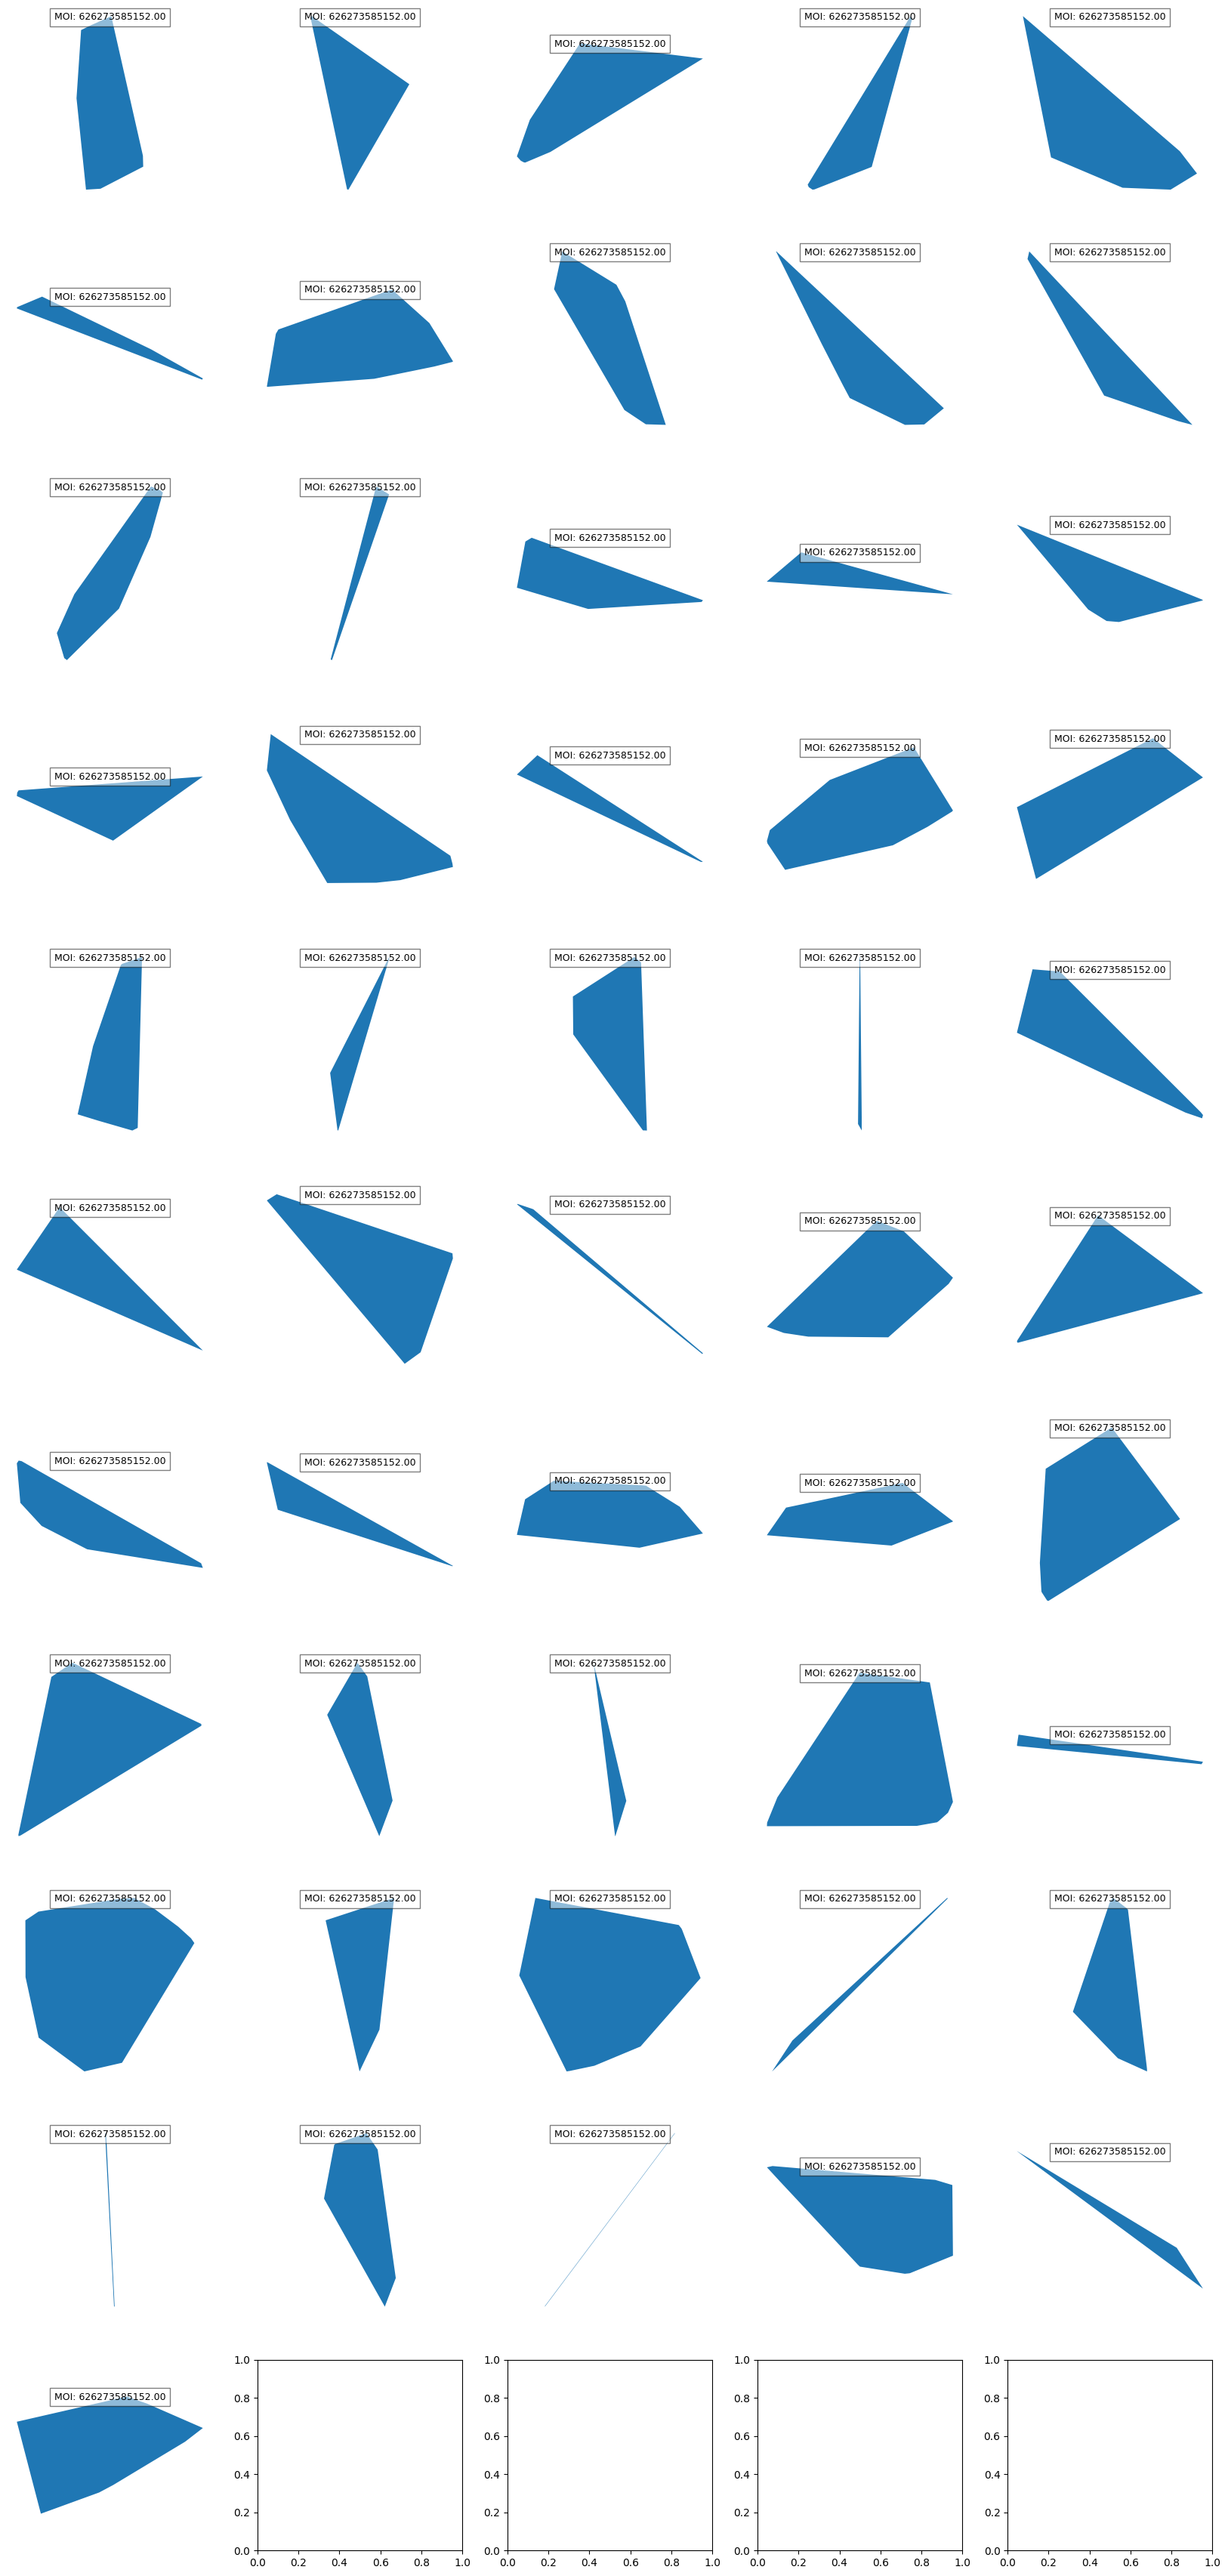

In [ ]:

import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pyproj

# Assuming all necessary functions are defined:
# - latlon_to_utm(lat, lon)
# - get_vertices_from_geom(geom)
# - calculate_centroid(vertices)
# - calculate_area(vertices)
# - calculate_moment_of_inertia(vertices)

gdf = gpd.read_file("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger_shapefile.shp")

unique_combinations = gdf.drop_duplicates(subset=['segment', 'label'])
total_combinations = len(unique_combinations)

# Define subplot grid
num_cols = 5
num_rows = total_combinations // num_cols + (total_combinations % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), constrained_layout=True)
axes = axes.flatten()

subplot_index = 0
for segment in sorted(gdf['segment'].unique()):
    for label in sorted(gdf[gdf['segment'] == segment]['label'].unique()):
        ax = axes[subplot_index]
        data_to_plot = gdf[(gdf['segment'] == segment) & (gdf['label'] == label)]
        data_to_plot.plot(ax=ax)

        # Initialize list to store moments of inertia for each geometry
        moments_of_inertia = []
        for _, row in data_to_plot.iterrows():
            geom = row.geometry
            if geom.is_empty:
                continue  # Skip empty geometries
            vertices = get_vertices_from_geom(geom)
            moment_of_inertia = calculate_moment_of_inertia(vertices)
            moments_of_inertia.append(moment_of_inertia)

        ax.text(0.5, 0.95, f'MOI: {moi:.2f}', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

        ax.axis('off')  # Optionally turn off the axis for a cleaner look
        subplot_index += 1

plt.tight_layout()
plt.show()


In [ ]:
# Initialize list to store moments of inertia for each geometry
moments_of_inertia

[626273585152.0]

<ipython-input-3-6bb0e58abda2>:78: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  MIs = [calculate_moment_of_inertia(get_vertices_from_geom(geom)) for _, geom in data_to_plot.geometry.iteritems() if not geom.is_empty]
<ipython-input-3-6bb0e58abda2>:78: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  MIs = [calculate_moment_of_inertia(get_vertices_from_geom(geom)) for _, geom in data_to_plot.geometry.iteritems() if not geom.is_empty]
<ipython-input-3-6bb0e58abda2>:78: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  MIs = [calculate_moment_of_inertia(get_vertices_from_geom(geom)) for _, geom in data_to_plot.geometry.iteritems() if not geom.is_empty]
<ipython-input-3-6bb0e58abda2>:78: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  MIs = [calculate_moment_of_inertia(get_verti

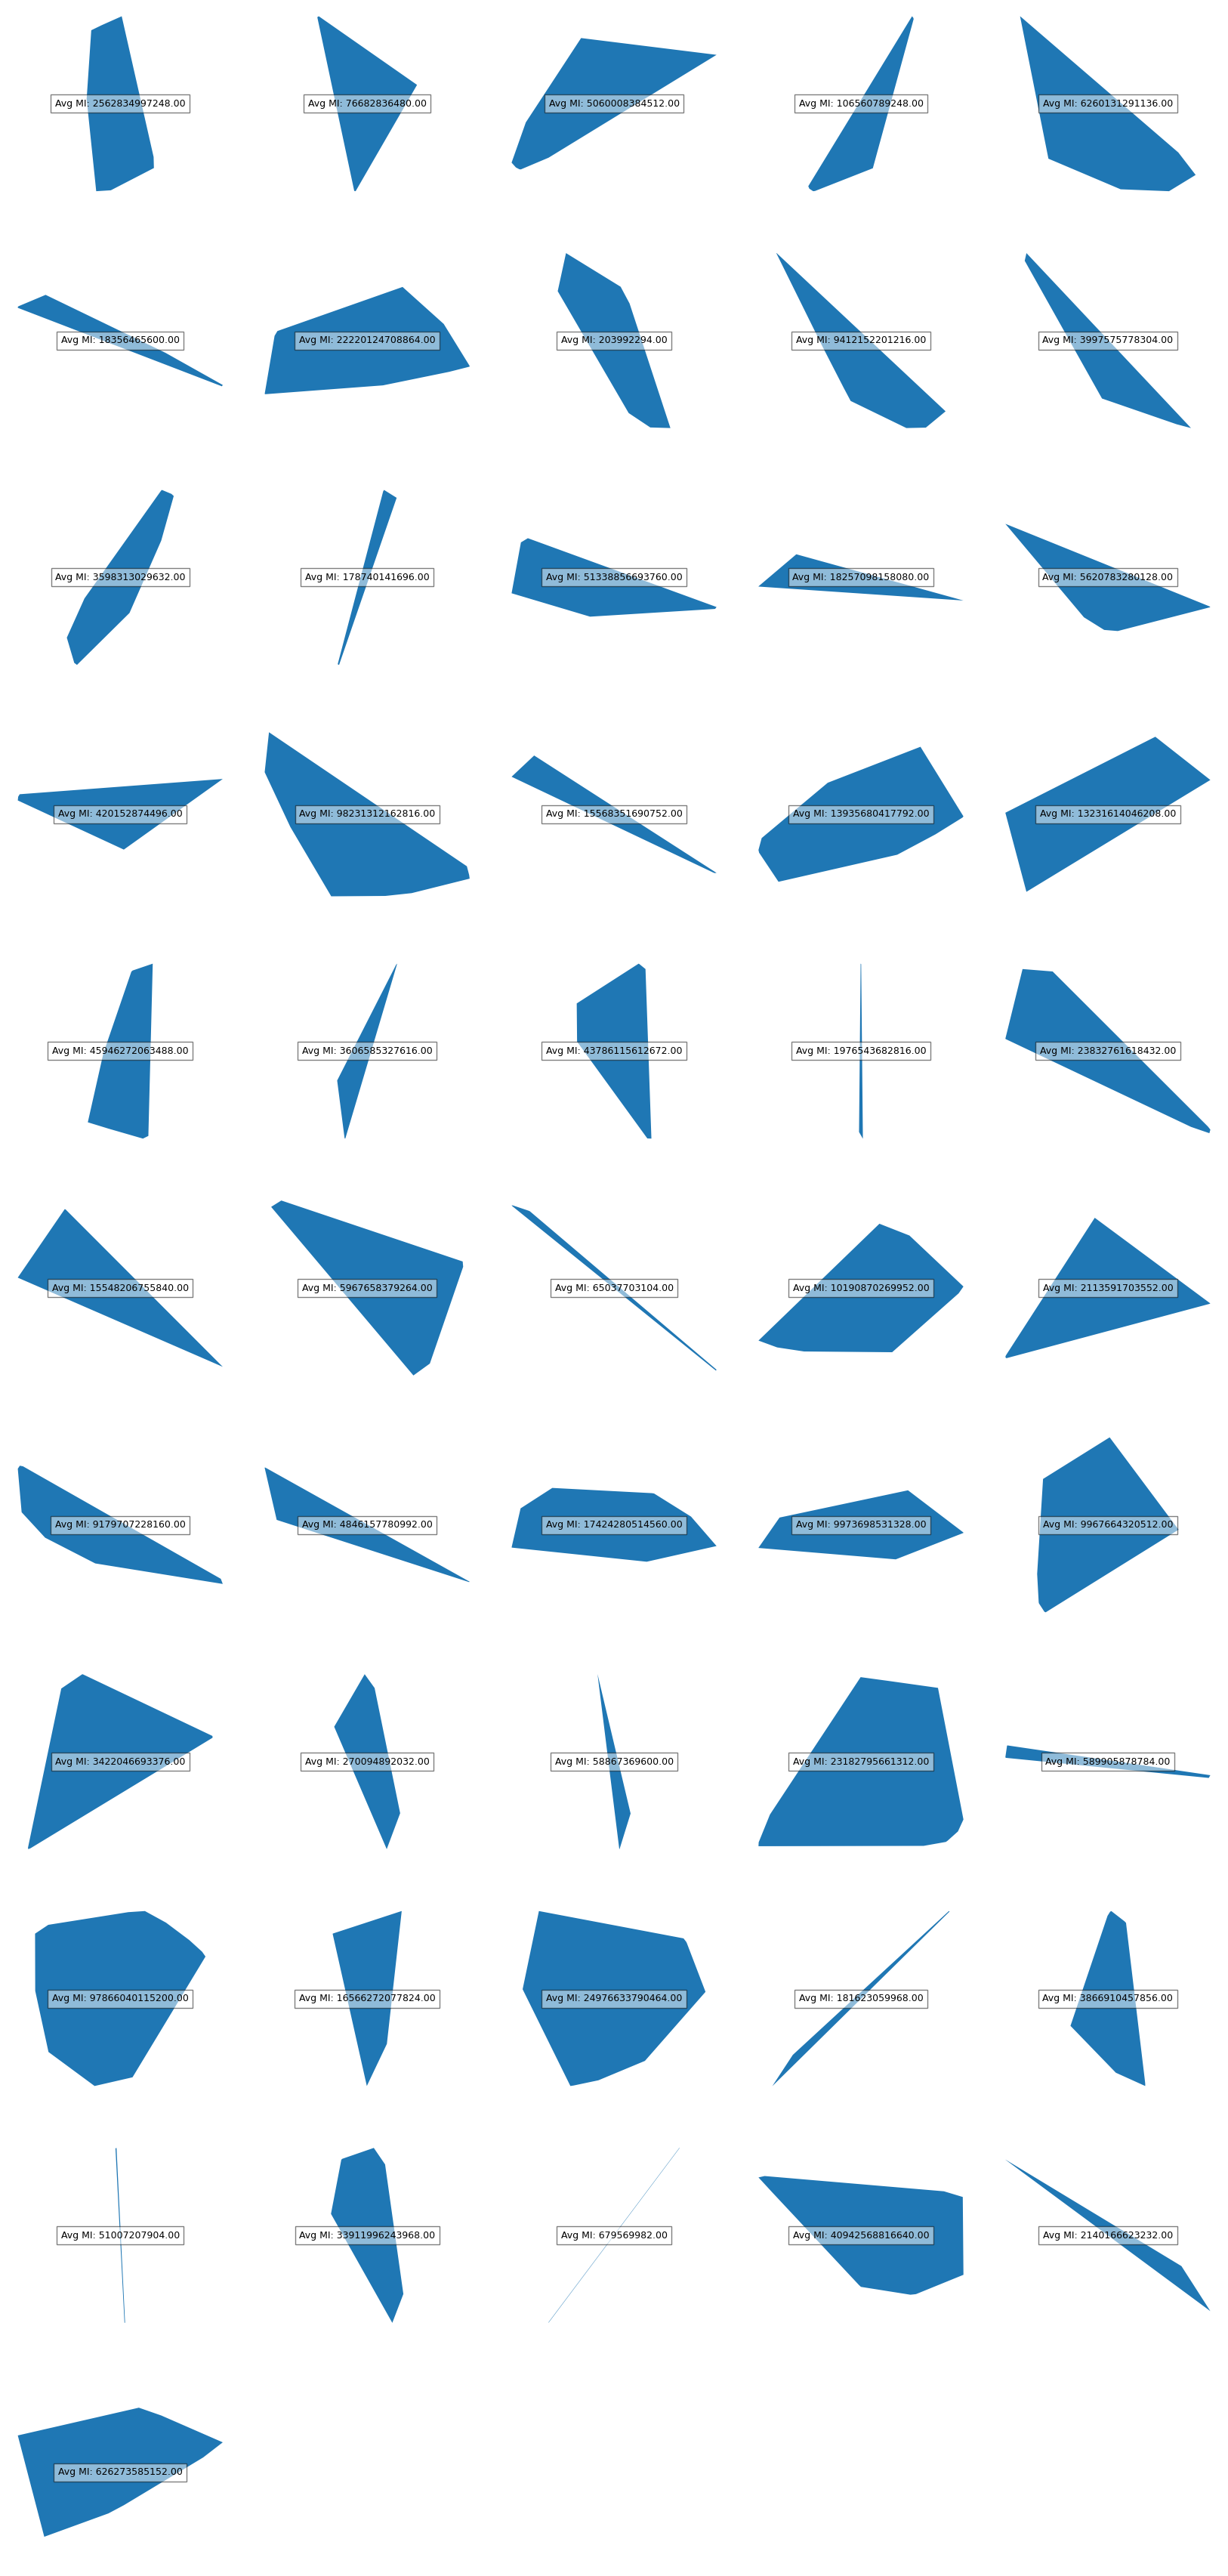

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pyproj
from shapely.geometry import Polygon

# Define the necessary geometric calculation functions
def latlon_to_utm(lat, lon):
    """Convert latitude and longitude to UTM coordinates."""
    zone_number = int((lon + 180) / 6) + 1
    utm_proj = pyproj.Proj(proj='utm', zone=zone_number, ellps='WGS84', datum='WGS84')
    utm_x, utm_y = utm_proj(lon, lat)
    return utm_x, utm_y

def get_vertices_from_geom(geom):
    """Extracts vertices from a geometry, converts them to UTM coordinates."""
    if geom.geom_type == 'Polygon':
        coords = geom.exterior.coords
    elif geom.geom_type == 'MultiPolygon':
        coords = geom.geoms[0].exterior.coords  # For simplicity, use the first polygon
    else:
        raise ValueError("Unsupported geometry type")
    return [latlon_to_utm(lat, lon) for lon, lat in coords]

def calculate_centroid(vertices):
    """Calculate the centroid of a polygon represented by its vertices."""
    polygon = Polygon(vertices)
    return polygon.centroid.x, polygon.centroid.y

def calculate_area(vertices):
    """Calculate the area of a polygon represented by its vertices."""
    polygon = Polygon(vertices)
    return polygon.area

def calculate_moment_of_inertia(vertices):
    """Calculate the moment of inertia for a polygon represented by its vertices."""
    if not np.array_equal(vertices[0], vertices[-1]):
        vertices.append(vertices[0])
    n = len(vertices) - 1
    I_g = 0
    for i in range(n):
        x_i, y_i = vertices[i]
        x_next, y_next = vertices[(i + 1) % n]
        common_term = x_i * y_next - x_next * y_i
        I_g += common_term * (x_i**2 + x_i * x_next + x_next**2 + y_i**2 + y_i * y_next + y_next**2)
    I_g *= 1/12
    centroid_x, centroid_y = calculate_centroid(vertices)
    A = calculate_area(vertices)
    d_x, d_y = centroid_x - 0, centroid_y - 0  # Assuming the origin is (0,0)
    d = np.sqrt(d_x**2 + d_y**2)
    I_s = abs(I_g + d**2 * A)
    return I_s

# Load the GeoDataFrame
gdf = gpd.read_file("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger_shapefile.shp")

# Determine the unique combinations of segments and labels
unique_combinations = gdf.drop_duplicates(subset=['segment', 'label'])
total_combinations = len(unique_combinations)

# Define the subplot grid
num_cols = 5
num_rows = total_combinations // num_cols + (total_combinations % num_cols > 0)

# Create the figure and axes for plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.flatten()

# Iterate over each unique segment-label combination and plot
subplot_index = 0
for segment in sorted(gdf['segment'].unique()):
    for label in sorted(gdf[gdf['segment'] == segment]['label'].unique()):
        ax = axes[subplot_index]
        data_to_plot = gdf[(gdf['segment'] == segment) & (gdf['label'] == label)]
        data_to_plot.plot(ax=ax)

        # Calculate MI for each geometry and display the average
        MIs = [calculate_moment_of_inertia(get_vertices_from_geom(geom)) for _, geom in data_to_plot.geometry.iteritems() if not geom.is_empty]

        if MIs:
            avg_MI = np.mean(MIs)
            ax.text(0.5, 0.5, f'Avg MI: {avg_MI:.2f}', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
        else:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_title(f'Segment {segment}: {label}', fontsize=10)
        ax.axis('off')  # Optionally turn off the axis for a cleaner look
        subplot_index += 1


for j in range(subplot_index, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



<ipython-input-4-4903051eda1b>:86: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


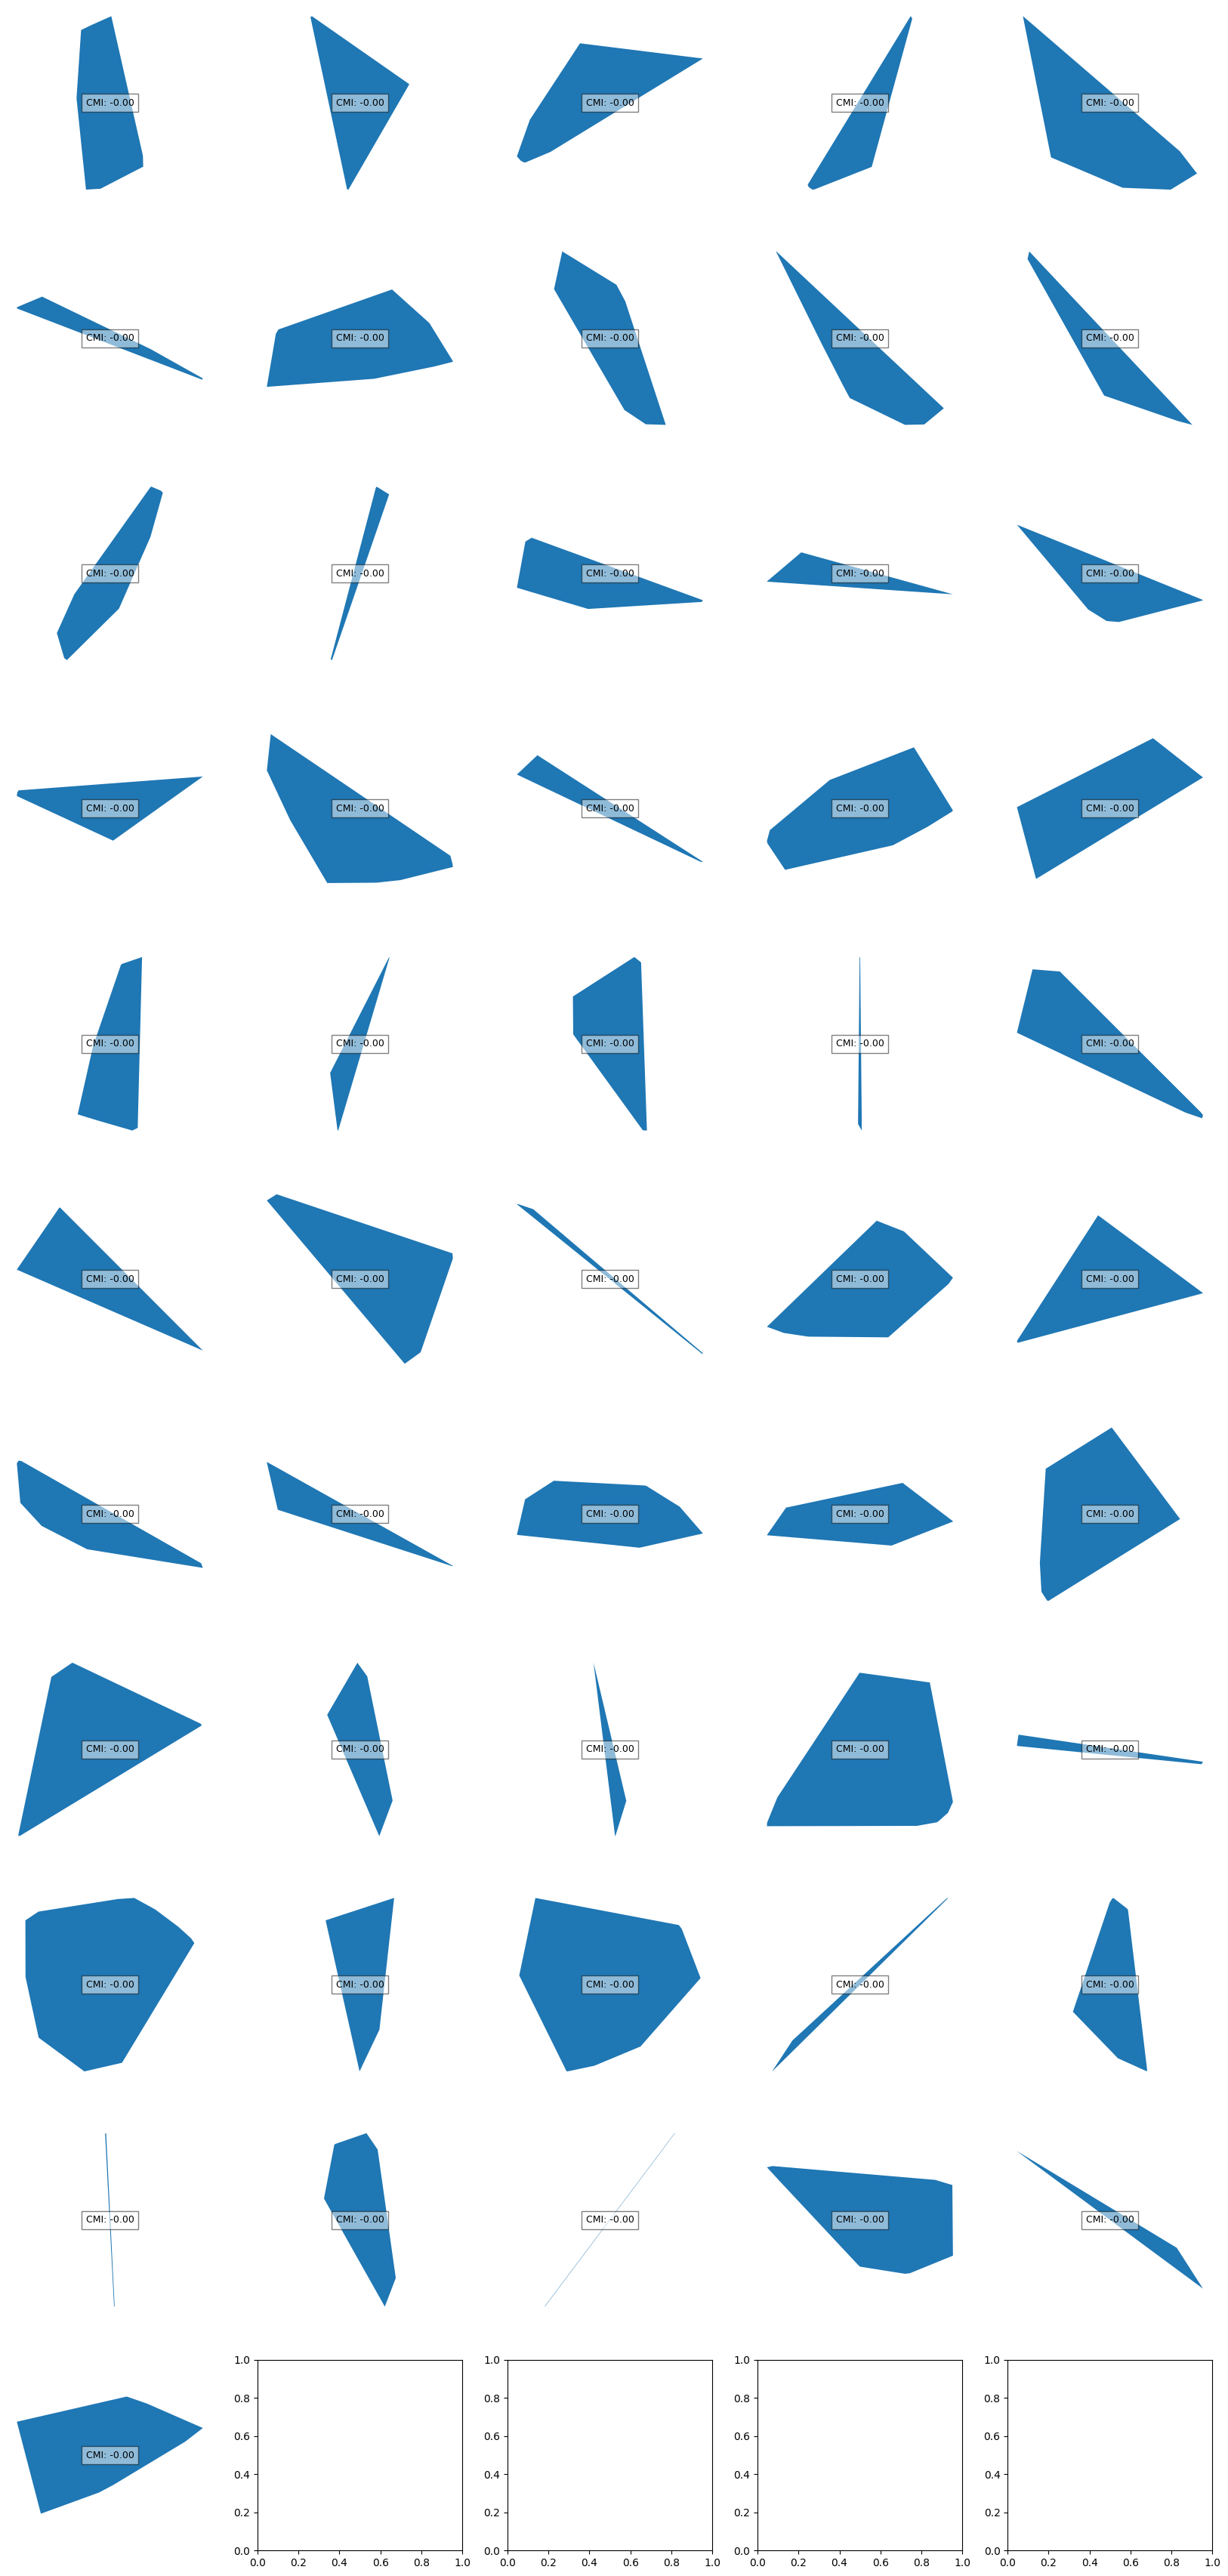

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pyproj
from shapely.geometry import Polygon

# Define the necessary geometric calculation functions
def latlon_to_utm(lat, lon):
    """Convert latitude and longitude to UTM coordinates."""
    zone_number = int((lon + 180) / 6) + 1
    utm_proj = pyproj.Proj(proj='utm', zone=zone_number, ellps='WGS84', datum='WGS84')
    utm_x, utm_y = utm_proj(lon, lat)
    return utm_x, utm_y

def get_vertices_from_geom(geom):
    """Extracts vertices from a geometry, converts them to UTM coordinates."""
    if geom.geom_type == 'Polygon':
        coords = geom.exterior.coords
    elif geom.geom_type == 'MultiPolygon':
        # For simplicity, use the first polygon
        coords = geom.geoms[0].exterior.coords
    else:
        raise ValueError("Unsupported geometry type")
    return [latlon_to_utm(lat, lon) for lon, lat in coords]

def calculate_centroid(vertices):
    """Calculate the centroid of a polygon represented by its vertices."""
    polygon = Polygon(vertices)
    return polygon.centroid.x, polygon.centroid.y

def calculate_area(vertices):
    """Calculate the area of a polygon represented by its vertices."""
    polygon = Polygon(vertices)
    return polygon.area

def calculate_moment_of_inertia(vertices):
    """Calculate the moment of inertia for a polygon represented by its vertices."""
    if not np.array_equal(vertices[0], vertices[-1]):
        vertices.append(vertices[0])
    n = len(vertices) - 1
    I_g = 0
    for i in range(n):
        x_i, y_i = vertices[i]
        x_next, y_next = vertices[(i + 1) % n]
        common_term = x_i * y_next - x_next * y_i
        I_g += common_term * (x_i**2 + x_i * x_next + x_next**2 + y_i**2 + y_i * y_next + y_next**2)
    I_g *= 1/12
    return I_g

def calculate_shape_index(vertices):
    """Calculate the shape index (CMI) based on moment of inertia."""
    A = calculate_area(vertices)  # Calculate the area of the polygon
    I_g = calculate_moment_of_inertia(vertices)  # Calculate the gross moment of inertia
    C_MI = (A**2) / (2 * np.pi * I_g)  # CMI formula
    return C_MI

# Load the GeoDataFrame
gdf = gpd.read_file("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger_shapefile.shp")

# Define the subplot grid
num_cols = 5
num_rows = int(np.ceil(gdf['segment'].nunique() * gdf['label'].nunique() / num_cols))

# Create the figure and axes for plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.flatten()

# Iterate over each unique segment-label combination and plot
subplot_index = 0
for _, row in gdf.iterrows():
    ax = axes[subplot_index]
    # Assuming each row in gdf is a unique shape to be plotted and analyzed
    geom = row.geometry
    if not geom.is_empty:
        vertices = get_vertices_from_geom(geom)
        CMI = calculate_shape_index(vertices)
        # Plotting the geometry
        gdf[gdf.index == _].plot(ax=ax)
        # Display CMI
        ax.text(0.5, 0.5, f'CMI: {CMI:.2f}', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    ax.axis('off')
    subplot_index += 1
    if subplot_index >= len(axes):  # Break the loop if there are more shapes than subplots
        break

plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pyproj
from shapely.geometry import Polygon


# Define the necessary geometric calculation functions
def latlon_to_utm(lat, lon):
    """Convert latitude and longitude to UTM coordinates."""
    zone_number = int((lon + 180) / 6) + 1
    utm_proj = pyproj.Proj(proj='utm', zone=zone_number, ellps='WGS84', datum='WGS84')
    utm_x, utm_y = utm_proj(lon, lat)
    return utm_x, utm_y

def get_vertices_from_geom(geom):
    """Extracts vertices from a geometry, converts them to UTM coordinates."""
    if geom.geom_type == 'Polygon':
        coords = geom.exterior.coords
    elif geom.geom_type == 'MultiPolygon':
        coords = geom.geoms[0].exterior.coords  # For simplicity, use the first polygon
    else:
        raise ValueError("Unsupported geometry type")
    return [latlon_to_utm(lat, lon) for lon, lat in coords]

def calculate_centroid(vertices):
    """Calculate the centroid of a polygon represented by its vertices."""
    polygon = Polygon(vertices)
    return polygon.centroid.x, polygon.centroid.y

def calculate_area(vertices):
    """Calculate the area of a polygon represented by its vertices."""
    polygon = Polygon(vertices)
    return polygon.area

def calculate_shape_index(vertices):
    """Calculate the shape index (CMI) based on moment of inertia."""
    A = calculate_area(vertices)  # Calculate the area of the polygon
    I_g = calculate_moment_of_inertia(vertices)  # Calculate the gross moment of inertia
    C_MI = (A**2) / (2 * np.pi * I_g)  # CMI formula
    return C_MI

# Load the GeoDataFrame
gdf = gpd.read_file("/content/drive/MyDrive/COMPACTNESS PROJECT /Data/tiger_shapefile.shp")

# Determine the unique combinations of segments and labels
unique_combinations = gdf.drop_duplicates(subset=['segment', 'label'])
total_combinations = len(unique_combinations)

# Define the subplot grid
num_cols = 5
num_rows = total_combinations // num_cols + (total_combinations % num_cols > 0)

# Create the figure and axes for plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.flatten()

# Iterate over each unique segment-label combination and plot
subplot_index = 0
for segment in sorted(gdf['segment'].unique()):
    for label in sorted(gdf[gdf['segment'] == segment]['label'].unique()):
        ax = axes[subplot_index]
        data_to_plot = gdf[(gdf['segment'] == segment) & (gdf['label'] == label)]
        data_to_plot.plot(ax=ax)

        # Initialize lists to store MI and CMI values for each geometry
        MIs = []
        CMIs = []
        for _, geom in data_to_plot.geometry.iteritems():
            if not geom.is_empty:
                vertices = get_vertices_from_geom(geom)
                MI = calculate_moment_of_inertia(vertices)
                CMI = calculate_shape_index(vertices)
                MIs.append(MI)
                CMIs.append(CMI)

        # Calculate and display the average MI and CMI if available
        if MIs and CMIs:
            avg_MI = np.mean(MIs)
            avg_CMI = np.mean(CMIs)
            ax.text(0.5, 0.8, f'Avg MI: {avg_MI:.2f}', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
            ax.text(0.5, 0.6, f'Avg CMI: {avg_CMI:.2f}', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
        else:
            ax.text(0.5, 0.7, 'No Data', ha='center', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

        ax.set_title(f'Segment {segment}: {label}', fontsize=10)
        ax.axis('off')
        subplot_index += 1

# Adjust any subplots beyond the count to not display
for j in range(subplot_index, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def latlon_to_epsg(lat, lon):
    """
    Determine the EPSG code for the UTM zone containing the given latitude and longitude.

    Parameters:
    lat (float): Latitude in decimal degrees.
    lon (float): Longitude in decimal degrees.

    Returns:
    int: The EPSG code for the UTM zone.
    """
    zone_number = int((lon + 180) / 6) + 1
    if lat >= 0:
        return 32600 + zone_number  # Northern hemisphere
    else:
        return 32700 + zone_number  # Southern hemisphere

# Example usage:
lat, lon = 15.561545, 99.328890  # New York City coordinates
epsg_code = latlon_to_epsg(lat, lon)
print(f"The EPSG code for the UTM zone is: {epsg_code}")


The EPSG code for the UTM zone is: 32647


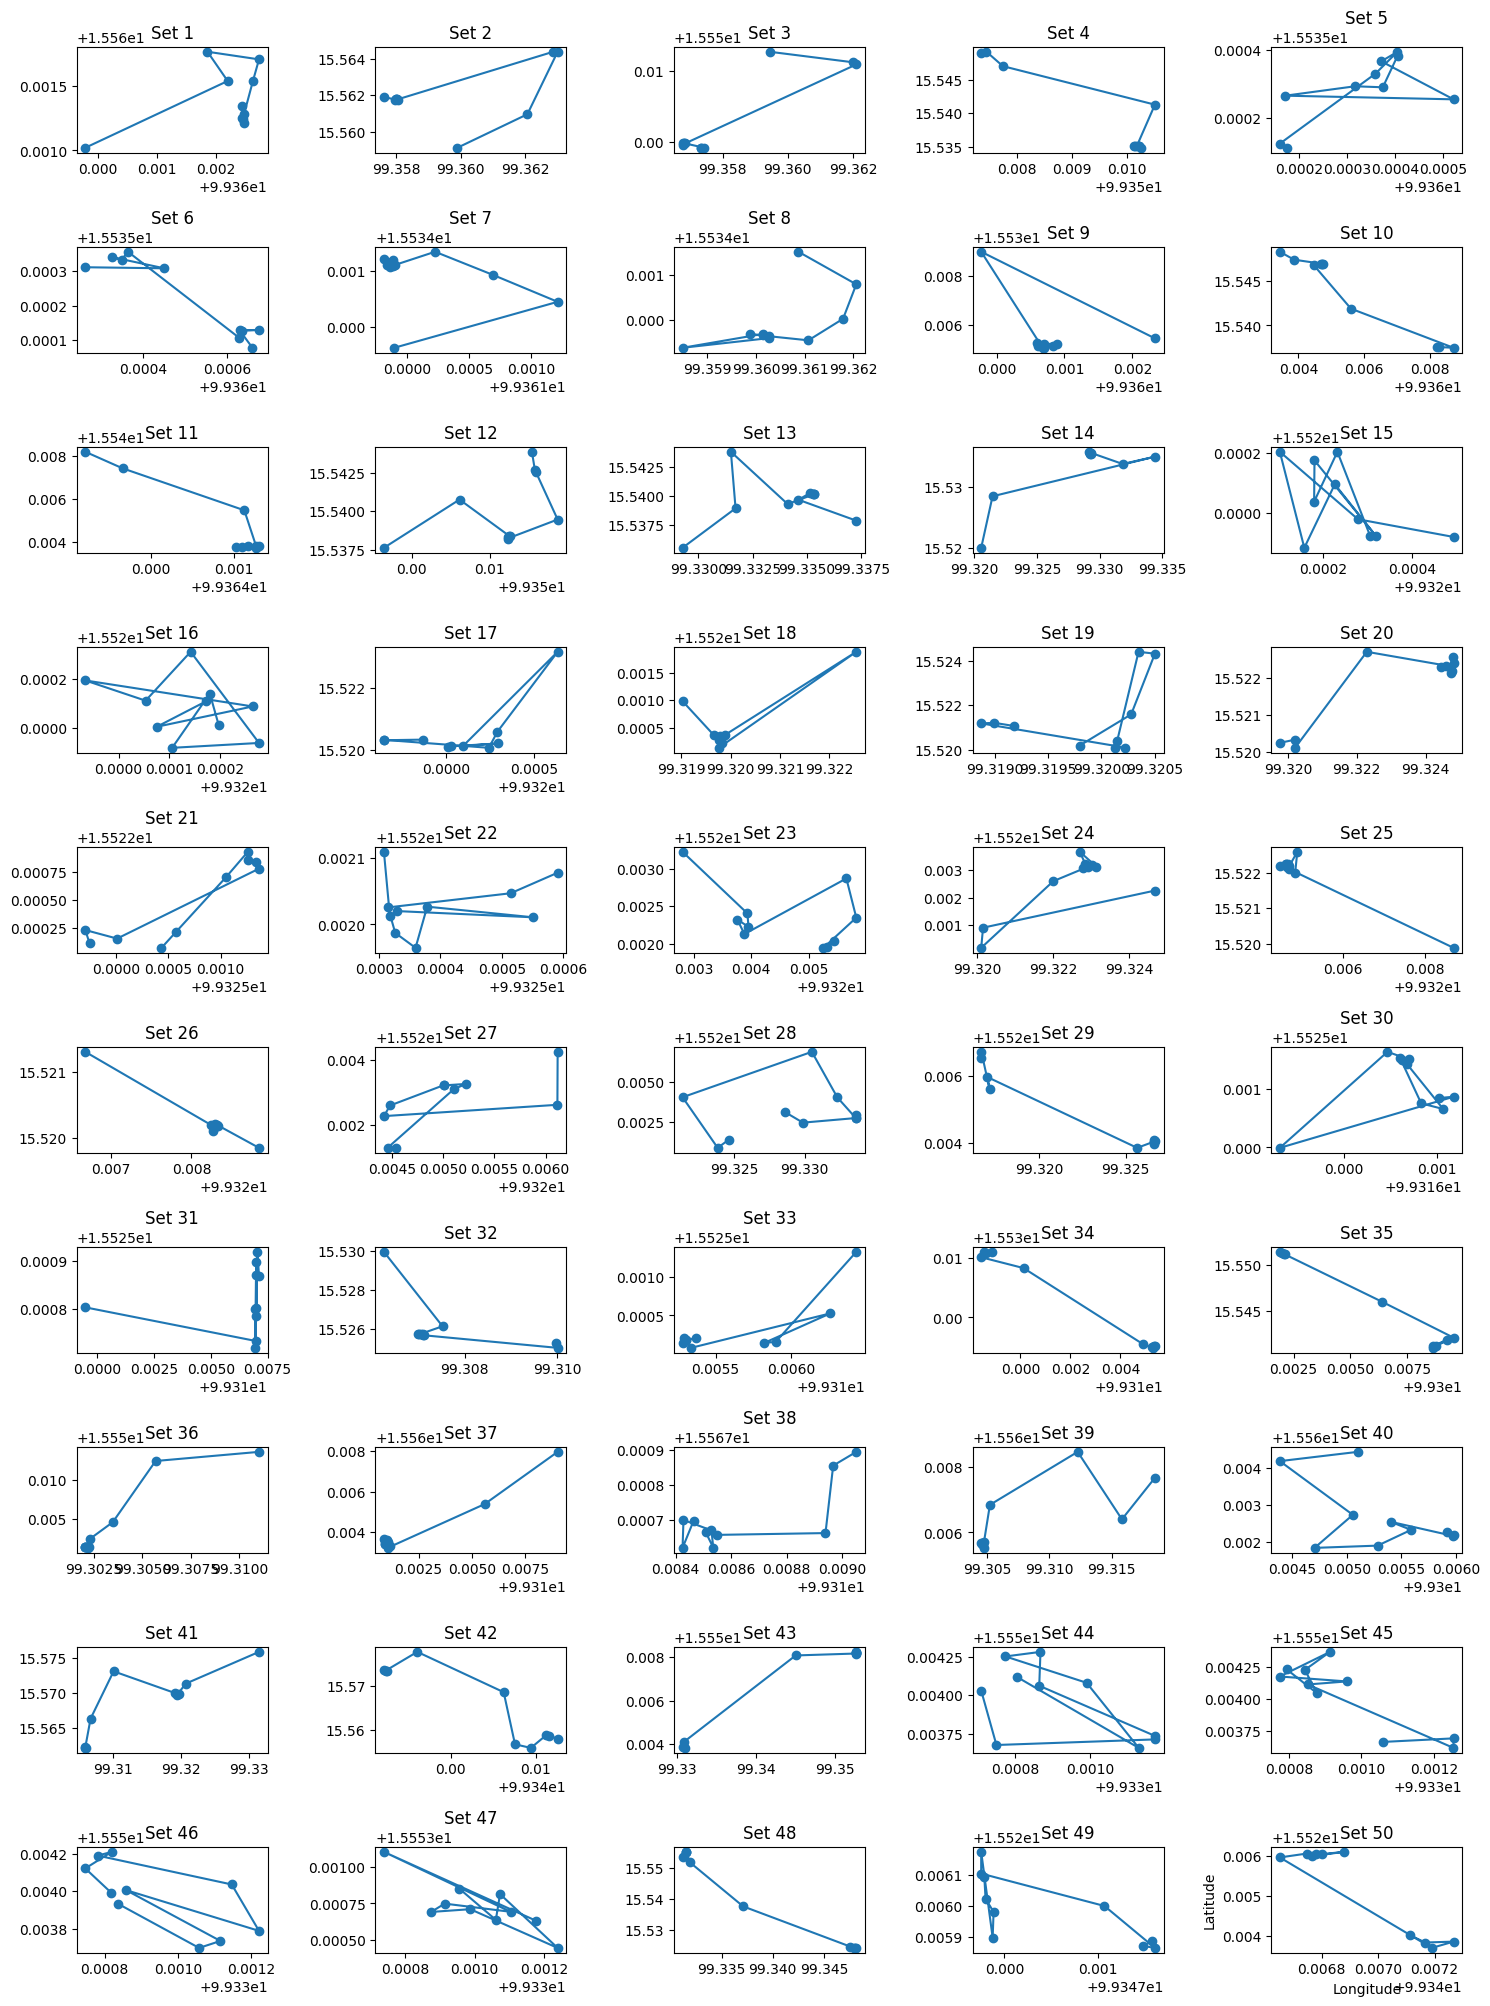

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Function to plot trajectories in sets of 10 points across 50 subplots
def plot_trajectories(x, y, points_per_set=10):
    # Determine the number of subplots needed
    num_points = len(x)
    num_subplots = num_points // points_per_set

    # Create figure and subplots
    fig, axs = plt.subplots(10, 5, figsize=(15, 20)) # Adjust the grid size as needed
    axs = axs.flatten() # Flatten the array of axes to iterate over it

    for i in range(num_subplots):
        # Extract the subset of points for the current subplot
        start_index = i * points_per_set
        end_index = start_index + points_per_set
        subset_x = x[start_index:end_index]
        subset_y = y[start_index:end_index]

        # Plot the subset of points
        axs[i].plot(subset_x, subset_y, marker='o')
        axs[i].set_title(f'Set {i+1}')

    for j in range(i+1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    # Add labels, legend, and show the plot
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()




plot_trajectories(x_pointss, y_pointss,)


# Convex Hull for Trajectories


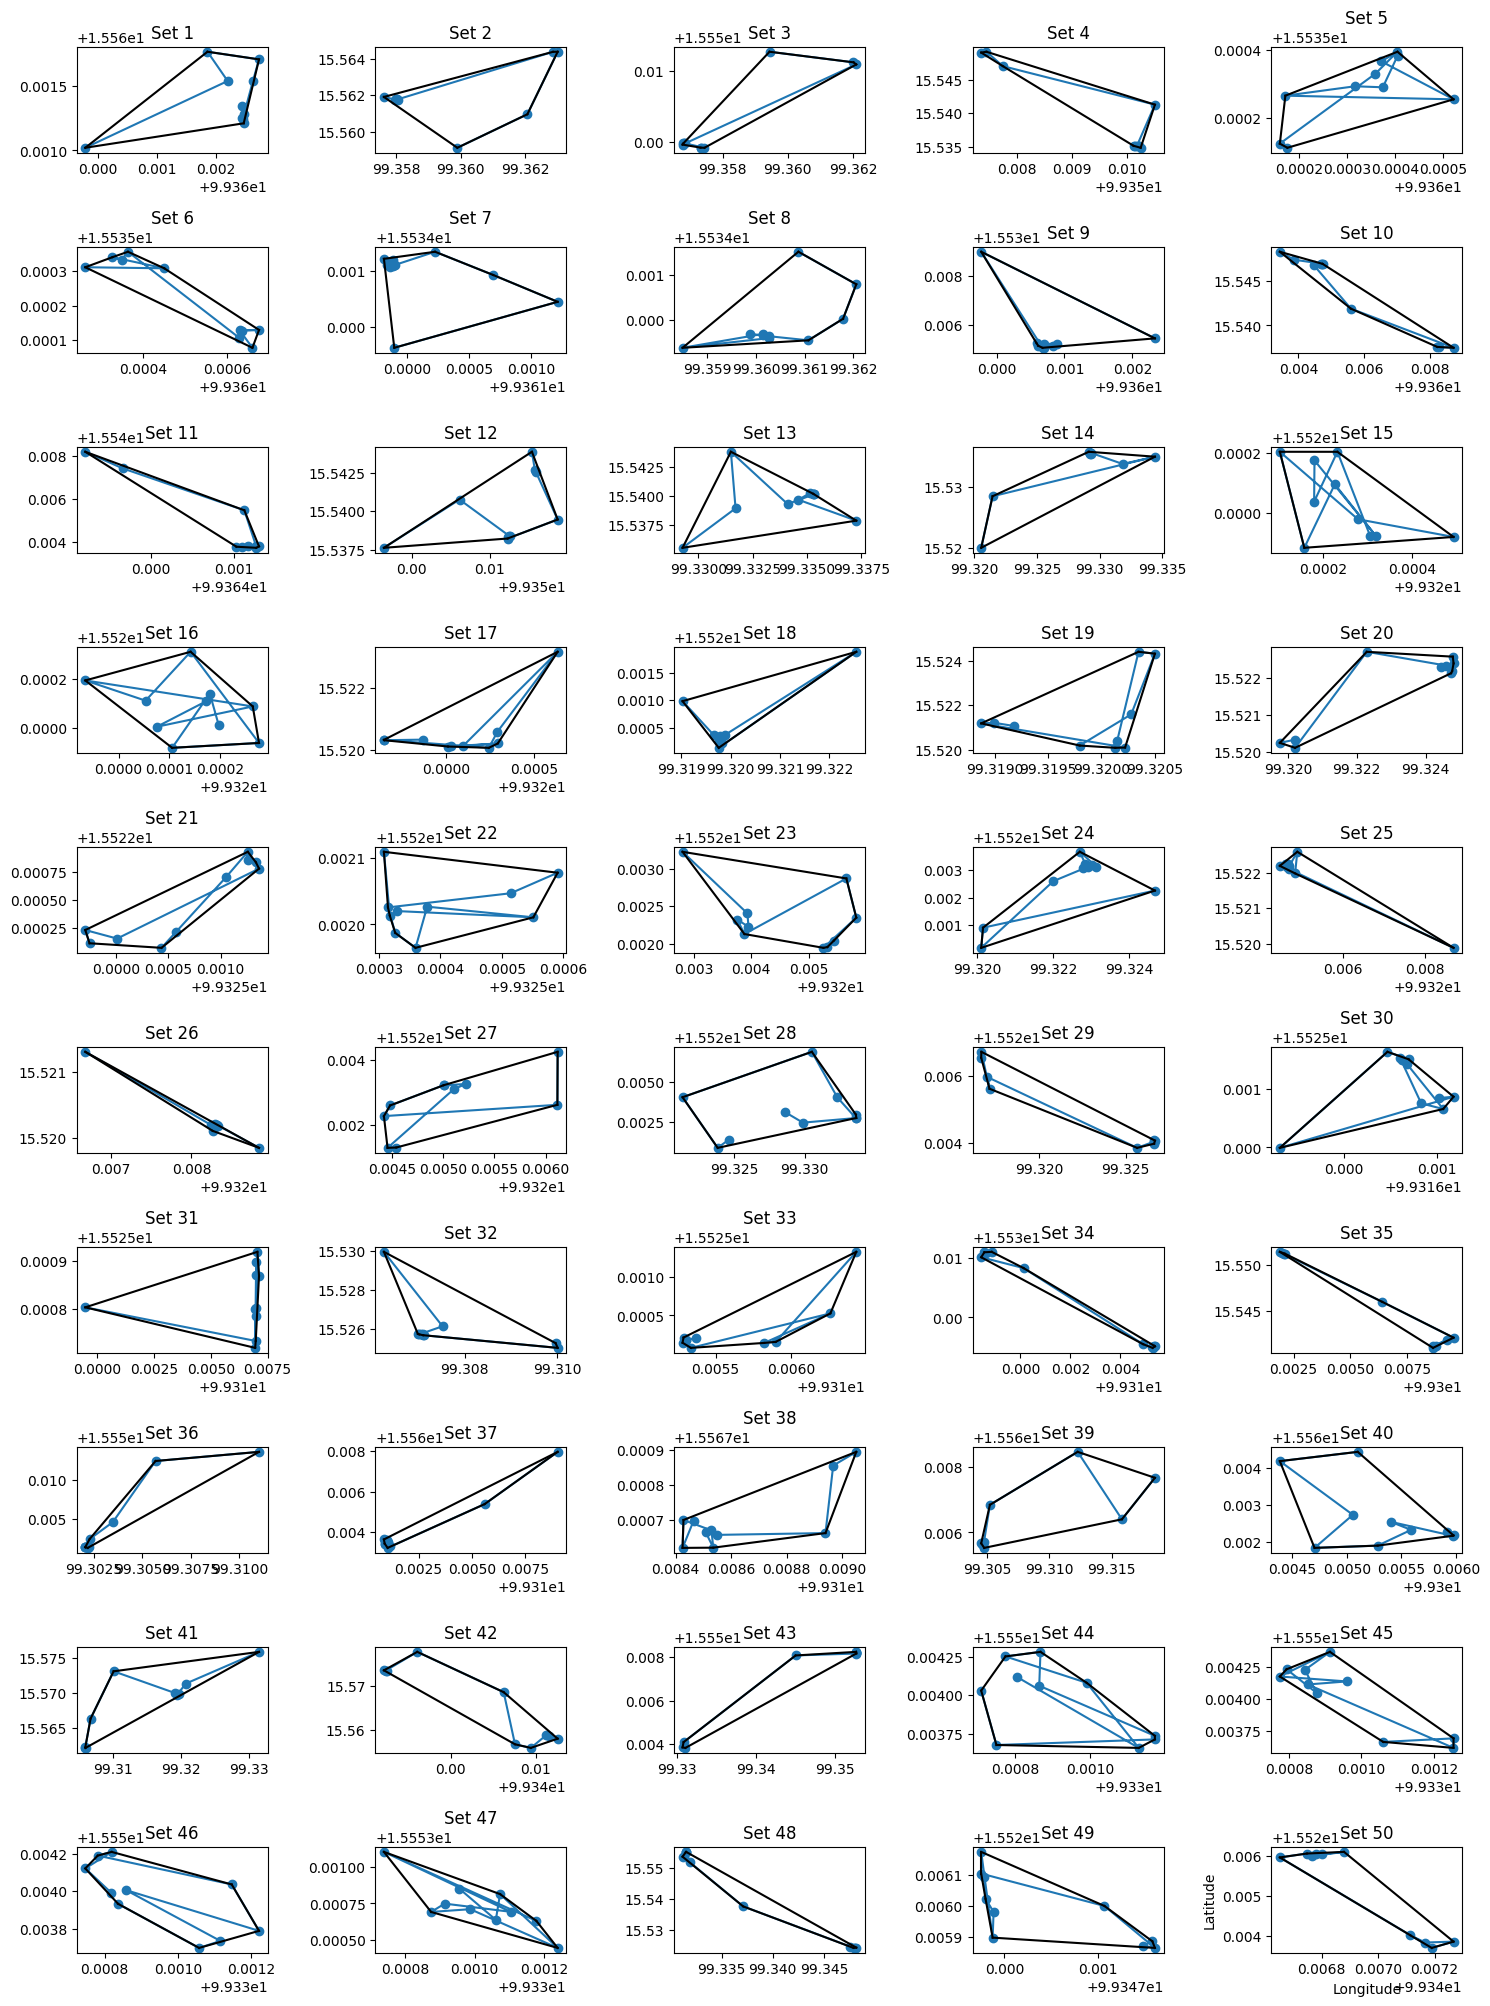

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Function to plot trajectories in sets of 10 points across 50 subplots
def plot_trajectories_with_hulls(x, y, points_per_set=10):
    # Determine the number of subplots needed
    num_points = len(x)
    num_subplots = num_points // points_per_set

    # Create figure and subplots
    fig, axs = plt.subplots(10, 5, figsize=(15, 20))  # Adjust the grid size as needed
    axs = axs.flatten()  # Flatten the array of axes to iterate over it

    for i in range(num_subplots):
        # Extract the subset of points for the current subplot
        start_index = i * points_per_set
        end_index = start_index + points_per_set
        subset_x = x[start_index:end_index]
        subset_y = y[start_index:end_index]

        # Plot the subset of points
        axs[i].plot(subset_x, subset_y, marker='o')
        axs[i].set_title(f'Set {i+1}')

        # Calculate and plot the convex hull for the subset
        if len(subset_x) > 2:  # ConvexHull needs at least 3 points to work
            points = np.vstack((subset_x, subset_y)).T  # Combine x and y points
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                axs[i].plot(points[simplex, 0], points[simplex, 1], 'k-')  # Plot hull

    for j in range(i+1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Assuming x_pointss and y_pointss are defined and contain your trajectory data
# Example usage (uncomment and replace with your data):
# x_pointss = np.random.rand(500)  # Example x coordinates
# y_pointss = np.random.rand(500)  # Example y coordinates
plot_trajectories_with_hulls(x_pointss, y_pointss)


# Function to calculate all

# Moment of Inertia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import math
import pandas as pd

def calculate_moment_of_inertia(vertices):
    if not np.array_equal(vertices[0], vertices[-1]):
        vertices = np.vstack([vertices, vertices[0]])

    n = len(vertices) - 1
    I_g = 0
    for i in range(n):
        x_i, y_i = vertices[i]
        x_next, y_next = vertices[i + 1]
        common_term = x_i * y_next - x_next * y_i
        I_g += (common_term * (x_i**2 + x_next**2 + x_i * x_next + y_i**2 + y_next**2 + y_i * y_next))
    I_g *= 1/12

    return abs(I_g)

def plot_trajectories_with_hulls_and_pp_and_moi_and_table(x, y, points_per_set=10):
    num_points = len(x)
    num_subplots = num_points // points_per_set
    results = []

    for i in range(num_subplots):
        subset_x = x[i * points_per_set:(i + 1) * points_per_set]
        subset_y = y[i * points_per_set:(i + 1) * points_per_set]

        if len(subset_x) > 2:
            points = np.vstack((subset_x, subset_y)).T
            hull = ConvexHull(points)
            hull_area = hull.volume
            hull_perimeter = np.sum(np.sqrt(np.sum(np.diff(points[hull.vertices, :], axis=0)**2, axis=1))) + np.sqrt(np.sum((points[hull.vertices[0], :] - points[hull.vertices[-1], :])**2))
            pp_measure = (4 * math.pi * hull_area) / (hull_perimeter**2)
            moi = calculate_moment_of_inertia(points[hull.vertices])

            results.append({'Set': i + 1, 'Moment of Inertia': moi, 'Polsby-Popper': pp_measure})

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    print(results_df)

# Assuming x_points and y_points are defined and contain your trajectory data
  # Example y coordinates
plot_trajectories_with_hulls_and_pp_and_moi_and_table(x_pointss, y_pointss)


    Set  Moment of Inertia  Polsby-Popper
0     1           0.010499       0.322796
1     2           0.135206       0.660503
2     3           0.257305       0.346917
3     4           0.124644       0.175946
4     5           0.000529       0.673518
5     6           0.000334       0.405562
6     7           0.013437       0.695442
7     8           0.038603       0.615832
8     9           0.035489       0.432462
9    10           0.096309       0.202464
10   11           0.019883       0.244267
11   12           0.605855       0.329441
12   13           0.314320       0.619594
13   14           0.757180       0.463451
14   15           0.000739       0.662602
15   16           0.000808       0.770426
16   17           0.010687       0.282206
17   18           0.018216       0.351398
18   19           0.035443       0.460901
19   20           0.051534       0.450875
20   21           0.005277       0.438330
21   22           0.000277       0.658028
22   23           0.022750       0

In [ ]:
import numpy as np
from shapely.geometry import Polygon
import math

def calculate_centroid(vertices):
    polygon = Polygon(vertices)
    return polygon.centroid.x, polygon.centroid.y

def calculate_area(vertices):
    polygon = Polygon(vertices)
    return polygon.area

def calculate_moment_of_inertia(vertices):
    # Ensure the first and last vertices are the same to close the polygon
    if not np.array_equal(vertices[0], vertices[-1]):
        vertices = np.vstack([vertices, vertices[0]])

    n = len(vertices) - 1  # Calculate the number of edges
    I_g = 0  # Initialize the moment of inertia

    # Loop through each edge of the polygon
    for i in range(n):
        x_i, y_i = vertices[i]  # Current vertex
        x_next, y_next = vertices[(i + 1) % n]  # Next vertex, modulo for wrapping
        common_term = x_i * y_next - x_next * y_i  # Cross product for area calculation

        # Increment moment of inertia using the formula for polygons
        I_g += common_term * (x_i**2 + x_i * x_next + x_next **2 +
                              y_i**2 + y_i * y_next + y_next**2)

    I_g *= 1/12

    # Calculate centroid
    centroid_x, centroid_y = calculate_centroid(vertices[:-1])

    # Area of the polygon
    A = calculate_area(vertices[:-1])

    # Distance from the centroid to the origin (assuming the origin is (0,0))
    d_x = centroid_x
    d_y = centroid_y
    d = np.sqrt(d_x**2 + d_y**2)  # Euclidean distance from centroid to origin

    # Adjust moment of inertia for the centroidal axis applying Parallel Axis Theorem
    I_s = I_g + d**2 * A

    return abs(I_s)  # Return the absolute value of moment of inertia


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import ConvexHull

def plot_trajectories_with_hulls_and_pp_and_moi_and_table(x, y, points_per_set=10):
    num_points = len(x)
    num_subplots = num_points // points_per_set
    results = []

    for i in range(num_subplots):
        subset_x = x[i * points_per_set:(i + 1) * points_per_set]
        subset_y = y[i * points_per_set:(i + 1) * points_per_set]

        if len(subset_x) > 2:
            points = np.vstack((subset_x, subset_y)).T
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            hull_points = np.vstack([hull_points, hull_points[0]])  # Ensure closure

            # Polsby-Popper measure
            pp_measure = 4 * math.pi * calculate_area(hull_points) / (calculate_perimeter(hull_points)**2)

            # Moment of inertia
            moi = calculate_moment_of_inertia(hull_points)

            results.append({'Set': i + 1, 'Moment of Inertia': moi, 'Polsby-Popper': pp_measure})

    # Display results in a table
    results_df = pd.DataFrame(results)
    print(results_df)

# Helper function to calculate perimeter
def calculate_perimeter(vertices):
    return Polygon(vertices).length

# Assuming x_points and y_points are defined and contain your trajectory data
#x_points = np.random.rand(500)  # Example x coordinates
#y_points = np.random.rand(500)  # Example y coordinates
plot_trajectories_with_hulls_and_pp_and_moi_and_table(x_pointss, y_pointss)


    Set  Moment of Inertia  Polsby-Popper
0     1           0.020998       0.322796
1     2           0.270412       0.660503
2     3           0.514609       0.346917
3     4           0.249289       0.175946
4     5           0.001058       0.673518
5     6           0.000668       0.405562
6     7           0.026874       0.695442
7     8           0.077206       0.615832
8     9           0.070979       0.432462
9    10           0.192619       0.202464
10   11           0.039765       0.244267
11   12           1.211709       0.329441
12   13           0.628641       0.619594
13   14           1.514361       0.463451
14   15           0.001478       0.662602
15   16           0.001617       0.770426
16   17           0.021375       0.282206
17   18           0.036432       0.351398
18   19           0.070886       0.460901
19   20           0.103069       0.450875
20   21           0.010553       0.438330
21   22           0.000554       0.658028
22   23           0.045499       0

In [ ]:
def calculate_centroid(vertices):
    polygon = Polygon(vertices)
    return polygon.centroid.x, polygon.centroid.y


In [ ]:
def calculate_moment_of_inertia(vertices):
    # Ensure the first and last vertices are the same to close the polygon
    if not np.array_equal(vertices[0], vertices[-1]):
        vertices.append(vertices[0])

    n = len(vertices) - 1 # Calculate the number of edges
    I_g = 0  # Initialize the moment of inertia

    # Loop through each edge of the polygon
    for i in range(n):
        x_i, y_i = vertices[i]  # Current vertex
        x_next, y_next = vertices[(i + 1) % n]  # Next vertex, modulo for wrapping
        common_term = x_i * y_next - x_next * y_i  # Cross product for area calculation

        # Increment moment of inertia using the formula for polygons
        I_g += common_term * (x_i**2 + x_i * x_next + x_next **2 +
                    y_i**2 + y_i*y_next + y_next**2)

    I_g *= 1/12

    # Calculate centroid
    centroid_x, centroid_y = calculate_centroid(vertices)

    # Area of the polygon
    A = calculate_area(vertices)

    # Distance from the centroid to the origin (assuming the origin is (0,0))
    d_x = centroid_x
    d_y = centroid_y
    d = np.sqrt(d_x**2 + d_y**2)  # Euclidean distance from centroid to origin

    # Adjust moment of inertia for the centroidal axis applying Parallel Axus Theorem
    I_s = I_g + d**2 * A

    return abs(I_s) # Return the absolute value of moment of inertia

In [ ]:
from shapely.geometry import Polygon
import numpy as np

# Define the missing calculate_area function
def calculate_area(vertices):
    polygon = Polygon(vertices)
    return polygon.area

# Assume calculate_centroid and calculate_moment_of_inertia are defined as in your snippet

# Function to process trajectories, plot them, and calculate moment of inertia for each set
def process_trajectories_with_hulls(x, y, points_per_set=10):
    num_points = len(x)
    num_subplots = num_points // points_per_set

    moments_of_inertia = []  # Store moments of inertia for each set

    for i in range(num_subplots):
        start_index = i * points_per_set
        end_index = start_index + points_per_set
        subset_x = x[start_index:end_index]
        subset_y = y[start_index:end_index]

        if len(subset_x) > 2:  # Need at least 3 points for a convex hull
            points = np.vstack((subset_x, subset_y)).T
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]  # Extract hull vertices

            # Calculate moment of inertia for the convex hull
            moment_of_inertia = calculate_moment_of_inertia(hull_points.tolist())
            moments_of_inertia.append(moment_of_inertia)

    return moments_of_inertia

# Assuming x_pointss and y_pointss are defined and contain your trajectory data
# Example usage (uncomment and replace with your data):
# x_pointss = np.random.rand(500)  # Example x coordinates
# y_pointss = np.random.rand(500)  # Example y coordinates
moments_of_inertia = process_trajectories_with_hulls(x_pointss, y_pointss)
print(moments_of_inertia)
len (moments_of_inertia)

[0.02099762888640036, 0.27041210962142115, 0.5146090587091172, 0.24928891607502313, 0.0010579881444585022, 0.0006681388827156464, 0.02687444250439889, 0.0772060413065668, 0.07097896029744703, 0.19261896935832173, 0.03976542597281704, 1.2117090257440593, 0.6286408415578317, 1.5143606995297825, 0.0014777259213458467, 0.0016168902155349113, 0.021374576849771086, 0.0364323651015387, 0.0708859929441673, 0.10306851158262835, 0.010553348799413173, 0.0005543422147713491, 0.04549934768226486, 0.12269931219622669, 0.027142875788742027, 0.0028428851114792766, 0.05113929246023126, 0.8265716410426542, 0.13893195601288066, 0.02444157775056078, 0.015198936224714042, 0.13078350834198071, 0.010633604964233895, 0.2038875055435324, 0.18122755810600044, 0.5894229276649683, 0.08611194300047834, 0.00170064053243434, 0.4541229446003215, 0.05088303819031878, 2.348579802650991, 3.0862753423566476, 0.3685103460194046, 0.0037071978375224773, 0.002898620132070837, 0.0025742982504813063, 0.0020114269572181504, 1.4

50

In [ ]:
hull_points = points[hull.vertices]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
hull = ConvexHull(points)
            hull_points = points[hull.vertices]  # Extract hull vertices

            # Calculate moment of inertia for the convex hull
            moment_of_inertia = calculate_moment_of_inertia(hull_points.tolist())
            moments_of_inertia.append(moment_of_inertia)

    return moments_of_inertia

In [ ]:
def calculate_shape_index(vertices):
    A = calculate_area(vertices)  # Calculate the area of the polygon
    I_g = calculate_moment_of_inertia(vertices)  # Calculate the moment of inertia
    C_MI = (A**2) / (2 * np.pi * I_g)  # Calculate the shape index using the area and moment of inertia
    return C_MI  # Return the calculated shape index

# Polsby Proper

In [ ]:
# Copy from week 3 code
def single_polsby_popper(shape_gpd):
    """
    Calcualte the Polsby-Popper measure for a single shape (polygon).
    """
    # Attribtues
    perim = shape_gpd.length  # perimeter
    area = shape_gpd.area  # area

    # A circle whose circumference is equal to the perimeter of the shape
    radius = perim / (2 * math.pi)
    circle_area = math.pi * radius**2

    # Polsby-Popper measure
    pp = area / circle_area

    return pp

# Boyce Clark

In [ ]:
# Copy from week 2 code
def boyce_clark_index(distance):
    """
    INPUT
    ---------------------
    distance : NumPy array of radial line length

    OUTPUT
    ---------------------
    Boyce-Clark Index
    """
    return sum(abs((distance / sum(distance))*100 - (100/len(distance))))

In [ ]:
# Copy from week 2 code
def radial_line_distance(shape, num, r):
    """
    INPUT
    ---------------------
    shape : geometry of polygon
    num : number of radial lines
    r : initial length (or radius of minimum enclosing circle for the shape)

    OUTPUT
    ---------------------
    distance : NumPy array of radial line length
    r_line : list of radial line (LineString)
    """

    centroid = shape.centroid # generate centroid point as the central node
    distance = []
    r_line = []
    angles = np.linspace(0, 2 * np.pi, num+1) # calculate the angle in radians

    for angle in angles[:-1]:
        # Define a relatively far point on the radial line
        point_on_line = Point(centroid.x + 2 * r * np.cos(angle), centroid.y + 2 * r * np.sin(angle))

        # Create a line from the centroid to the point => radial line
        # Intersect with the polygon => cut off at the boundary
        radial_line = LineString([centroid, point_on_line]).intersection(shape)

        try:
            # if MultiLineString, choose the line segment starting from centroid
            for line in radial_line.geoms:
                if centroid.coords[0] == line.coords[0]:
                    radial_line = line
                else:
                    pass
        except:
            pass

        # Calculate and store the distance
        ri = radial_line.length
        distance.append(ri)
        r_line.append(radial_line)

    return r_line, np.array(distance)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
from shapely.geometry import Point, LineString, Polygon
import math
import pandas as pd

# Copy from week 2 code
def boyce_clark_index(distance):
    """
    INPUT
    ---------------------
    distance : NumPy array of radial line length

    OUTPUT
    ---------------------
    Boyce-Clark Index
    """
    return sum(abs((distance / sum(distance))*100 - (100/len(distance))))


def radial_line_distance(shape, num, r):
    """
    INPUT
    ---------------------
    shape : geometry of polygon
    num : number of radial lines
    r : initial length (or radius of minimum enclosing circle for the shape)

    OUTPUT
    ---------------------
    distance : NumPy array of radial line length
    r_line : list of radial line (LineString)
    """

    centroid = shape.centroid # generate centroid point as the central node
    distance = []
    r_line = []
    angles = np.linspace(0, 2 * np.pi, num+1) # calculate the angle in radians

    for angle in angles[:-1]:
        # Define a relatively far point on the radial line
        point_on_line = Point(centroid.x + 2 * r * np.cos(angle), centroid.y + 2 * r * np.sin(angle))

        # Create a line from the centroid to the point => radial line
        # Intersect with the polygon => cut off at the boundary
        radial_line = LineString([centroid, point_on_line]).intersection(shape)

        try:
            # if MultiLineString, choose the line segment starting from centroid
            for line in radial_line.geoms:
                if centroid.coords[0] == line.coords[0]:
                    radial_line = line
                else:
                    pass
        except:
            pass

        # Calculate and store the distance
        ri = radial_line.length
        distance.append(ri)
        r_line.append(radial_line)

    return r_line, np.array(distance)


def plot_trajectories_with_hulls_and_pp_and_moi_and_bc_and_table(x, y, points_per_set=10):
    num_points = len(x)
    num_subplots = num_points // points_per_set
    results = []

    for i in range(num_subplots):
        subset_x = x[i * points_per_set:(i + 1) * points_per_set]
        subset_y = y[i * points_per_set:(i + 1) * points_per_set]

        if len(subset_x) > 2:
            points = np.vstack((subset_x, subset_y)).T
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            hull_points = np.vstack([hull_points, hull_points[0]])  # Ensure closure

            # Polsby-Popper measure
            pp_measure = 4 * math.pi * calculate_area(hull_points) / (calculate_perimeter(hull_points)**2)

            # Moment of inertia
            moi = calculate_moment_of_inertia(hull_points)

            # Boyce-Clark Index
            _, radial_distances = radial_line_distance(Polygon(hull_points), 10, 1)  # Assuming initial radius as 1
            bc_index = boyce_clark_index(radial_distances)


            results.append({'Set': i + 1, 'Moment of Inertia': moi, 'Polsby-Popper': pp_measure, 'Boyce-Clark Index': bc_index})

    # Display results in a table
    results_df = pd.DataFrame(results)
    print(results_df)

# Helper function to calculate perimeter
def calculate_perimeter(vertices):
    return Polygon(vertices).length

# Assuming x_points and y_points are defined and contain your trajectory data
#x_points = np.random.rand(500)  # Example x coordinates
#y_points = np.random.rand(500)  # Example y coordinates
plot_trajectories_with_hulls_and_pp_and_moi_and_bc_and_table(x_pointss, y_pointss)


    Set  Moment of Inertia  Polsby-Popper  Boyce-Clark Index
0     1           0.020998       0.322796          43.493538
1     2           0.270412       0.660503          20.967380
2     3           0.514609       0.346917          64.307452
3     4           0.249289       0.175946          61.650159
4     5           0.001058       0.673518          30.818547
5     6           0.000668       0.405562          54.730342
6     7           0.026874       0.695442          16.157842
7     8           0.077206       0.615832          22.236515
8     9           0.070979       0.432462          40.142743
9    10           0.192619       0.202464          72.749197
10   11           0.039765       0.244267          59.230416
11   12           1.211709       0.329441          48.917454
12   13           0.628641       0.619594          16.552627
13   14           1.514361       0.463451          42.112092
14   15           0.001478       0.662602          17.214187
15   16           0.0016

In [ ]:
# Reock

In [ ]:
def _cast(collection):
    """
    Cast a collection to a shapely geometry array.
    """
    try:
        import geopandas
        import shapely
    except (ImportError, ModuleNotFoundError) as exception:
        raise type(exception)(
            "shapely and geopandas are required for shape statistics."
        )

    if Version(shapely.__version__) < Version("2"):
        raise ImportError("Shapely 2.0 or newer is required.")

    if isinstance(collection, (geopandas.GeoSeries, geopandas.GeoDataFrame)):
        return numpy.asarray(collection.geometry.array)
    else:
        if isinstance(collection, (numpy.ndarray, list)):
            return numpy.asarray(collection)
        else:
            return numpy.array([collection])


In [ ]:
def minimum_bounding_circle_ratio(collection):
    """
    The Reock compactness measure, defined by the ratio of areas between the
    minimum bounding/containing circle of a shape and the shape itself.

    Measure A1 in :cite:`altman1998Districting`,
    cited for Frolov (1974), but earlier from Reock
    (1963)
    """
    ga = _cast(collection)
    mbca = (shapely.minimum_bounding_radius(ga) ** 2) * numpy.pi
    return shapely.area(ga) / mbca


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point, LineString
import math

def minimum_bounding_circle_ratio(collection):
    """
    The Reock compactness measure, defined by the ratio of areas between the
    minimum bounding/containing circle of a shape and the shape itself.

    Measure A1 in :cite:`altman1998Districting`,
    cited for Frolov (1974), but earlier from Reock
    (1963)
    """
    try:
        import geopandas
        import shapely
    except (ImportError, ModuleNotFoundError) as exception:
        raise type(exception)(
            "shapely and geopandas are required for shape statistics."
        )

    if shapely.__version__ < "2":
        raise ImportError("Shapely 2.0 or newer is required.")

    if isinstance(collection, (geopandas.GeoSeries, geopandas.GeoDataFrame)):
        ga = np.asarray(collection.geometry.array)
    else:
        if isinstance(collection, (np.ndarray, list)):
            ga = np.asarray(collection)
        else:
            ga = np.array([collection])

    mbca = (shapely.minimum_bounding_radius(ga) ** 2) * np.pi
    return shapely.area(ga) / mbca

def plot_trajectories_with_hulls_and_pp_and_moi_and_bc_and_table(x, y, points_per_set=10):
    num_points = len(x)
    num_subplots = num_points // points_per_set
    results = []

    for i in range(num_subplots):
        subset_x = x[i * points_per_set:(i + 1) * points_per_set]
        subset_y = y[i * points_per_set:(i + 1) * points_per_set]

        if len(subset_x) > 2:
            points = np.vstack((subset_x, subset_y)).T
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            hull_points = np.vstack([hull_points, hull_points[0]])  # Ensure closure

            # Polsby-Popper measure
            pp_measure = 4 * math.pi * calculate_area(hull_points) / (calculate_perimeter(hull_points)**2)

            # Moment of inertia
            moi = calculate_moment_of_inertia(hull_points)

            # Boyce-Clark Index
            _, radial_distances = radial_line_distance(Polygon(hull_points), 10, 1)  # Assuming initial radius as 1
            bc_index = boyce_clark_index(radial_distances)

            # Convert hull points to a Polygon
            polygon = Polygon(hull_points)

            # Calculate Reock compactness measure
            reock_measure = minimum_bounding_circle_ratio(polygon)

            results.append({'Set': i + 1, 'Moment of Inertia': moi, 'Polsby-Popper': pp_measure, 'Boyce-Clark Index': bc_index, 'Reock Measure': reock_measure})

    # Display results in a table
    results_df = pd.DataFrame(results)
    print(results_df)

# Assuming x_points and y_points are defined and contain your trajectory data
#x_points = np.random.rand(500)  # Example x coordinates
#y_points = np.random.rand(500)  # Example y coordinates
plot_trajectories_with_hulls_and_pp_and_moi_and_bc_and_table(x_pointss, y_pointss)


    Set  Moment of Inertia  Polsby-Popper  Boyce-Clark Index  \
0     1           0.020998       0.322796          43.493538   
1     2           0.270412       0.660503          20.967380   
2     3           0.514609       0.346917          64.307452   
3     4           0.249289       0.175946          61.650159   
4     5           0.001058       0.673518          30.818547   
5     6           0.000668       0.405562          54.730342   
6     7           0.026874       0.695442          16.157842   
7     8           0.077206       0.615832          22.236515   
8     9           0.070979       0.432462          40.142743   
9    10           0.192619       0.202464          72.749197   
10   11           0.039765       0.244267          59.230416   
11   12           1.211709       0.329441          48.917454   
12   13           0.628641       0.619594          16.552627   
13   14           1.514361       0.463451          42.112092   
14   15           0.001478       0.66260

In [ ]:
import shapely.geometry

# Radius Of Gyration

In [ ]:
import skmob
from skmob.measures.individual import radius_of_gyration
df = pd.read_csv(url, sep='\t', header=0, nrows=100000,
             names=['user', 'check-in_time', 'latitude', 'longitude', 'location id'])
tdf = skmob.TrajDataFrame(df, latitude='latitude', longitude='longitude', datetime='check-in_time', user_id='user')
rg_df = radius_of_gyration(tdf)
print(rg_df.head())


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import pyspark.sql.functions as F

from pyspark.sql.window import Window

In [ ]:
spark = SparkSession \
        .builder.master('local[8]') \
        .appName('RadiusOfGyration') \
        .config('spark.sql.shuffle.partitions', 30) \
        .config('spark.driver.memory', '20g') \
        .config('spark.executor.memory', '20g') \
        .getOrCreate()

In [ ]:
path_data = "/content/drive/MyDrive/MA RESEARCH- CONTEXT AWARE SEGMENTATION/Deeplearningfolder/10727femalecsv.csv"
gps_data = spark.read.csv(path_data, header=True, inferSchema=True)

In [ ]:
import pyproj
from pyspark.sql.functions import udf
from pyspark.sql.window import Window
from pyspark.sql.types import FloatType, StructType, StructField

In [ ]:
import pyproj
from pyspark.sql.functions import udf
from pyspark.sql.types import StructType, StructField, FloatType

def latlon_to_utm(lat, lon):
    zone_number = int((lon + 180) / 6) + 1
    utm_converter = pyproj.Proj(proj='utm', zone=zone_number, ellps='WGS84')
    utm_x, utm_y = utm_converter(lon, lat)
    return (float(utm_x), float(utm_y))

# Define the UDF to convert lat/lon to UTM
schema = StructType([
    StructField("utm_x", FloatType(), False),
    StructField("utm_y", FloatType(), False)
])
utm_udf = udf(latlon_to_utm, schema)


In [ ]:
def cartesian_distance(x1, y1, x2, y2):
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

distance_udf = udf(cartesian_distance, FloatType())

In [ ]:


# Window specification for a window of size 5 for each user, ordered by a timestamp
window_size_5 = Window().partitionBy('idcollar').orderBy('timestamp').rowsBetween(Window.currentRow, 4)



In [ ]:
# Create new columns for window-based aggregates
gps_data_with_window = gps_data.withColumn('center_utm_x', F.avg('utm_x').over(window_size_5))
gps_data_with_window = gps_data_with_window.withColumn('center_utm_y', F.avg('utm_y').over(window_size_5))
gps_data_with_window = gps_data_with_window.withColumn('N', F.sum(F.lit(1)).over(window_size_5))


In [ ]:

# Calculate the distances using the Cartesian distance formula
gps_data_with_window = gps_data_with_window.withColumn('distance',
    distance_udf(gps_data_with_window.utm_x, gps_data_with_window.utm_y, gps_data_with_window.center_utm_x, gps_data_with_window.center_utm_y))




In [ ]:
# Calculate the radius of gyration
radius_df = (gps_data_with_window
             .withColumn('distance2', (F.col('distance') * F.col('distance')) / F.col('N'))
             .groupBy('idcollar', 'timestamp').agg(F.sum(F.col('distance2')).alias('sum_dist2'))
             .withColumn('radius_gyr', F.sqrt(F.col('sum_dist2')))
             .select('idcollar', 'timestamp', 'radius_gyr')
            )




#Building a Table

In [ ]:
def generate_moments_table(polys_gpd, num_radial_lines=32, r_initial=1):
    """
    Generate a table with calculated and true values of MI and C_MI for polygons,
    Polsby-Popper measure, and Boyce-Clark Index.

    Parameters:
    polys_gpd (GeoDataFrame): A GeoDataFrame containing polygons.

    Returns:
    pd.DataFrame: A DataFrame with columns for MI, C_MI, True_MI, True_C_MI, IPQ, and BC.
    """
    data = []

    # Calculate r_initial dynamically if not provided
    max_r = polys_gpd.geometry.apply(lambda g: g.minimum_rotated_rectangle.exterior.length / (2 * np.pi))

    for idx, polygon in polys_gpd.geometry.iteritems():
        vertices = get_vertices_from_geom(polygon)  # Assuming this function extracts vertices from polygons
        MI = calculate_moment_of_inertia(vertices)  # Custom function to calculate MI
        C_MI = calculate_shape_index(vertices)      # Custom function to calculate C_MI
        true_MI = esda.shape.second_areal_moment(polygon)[0]  # True MI from esda
        true_C_MI = esda.shape.nmi(polygon)[0]         # True C_MI from esda
        polsby_popper = single_polsby_popper(polygon)     # Calculate Polsby-Popper measure for each polygon

        # Calculate Boyce-Clark index, using dynamic radius
        r_initial = max_r.iloc[idx]
        _, distances = radial_line_distance(polygon, num_radial_lines, r_initial)  # Only get distances
        boyce_clark = boyce_clark_index(distances)  # Calculate Boyce-Clark index


        data.append({
            "MI": f"{MI:.3f}",
            "C_MI": f"{C_MI:.3f}",
            "True_MI": f"{true_MI:.3f}",
            "True_C_MI": f"{true_C_MI:.3f}",
            "Polsby-Popper": f"{polsby_popper:.3f}",
            "Boyce-Clark": f"{boyce_clark:.3f}"
        })

    results_df = pd.DataFrame(data)
    return results_df


In [ ]:
# Polygon as a bounday